<a href="https://colab.research.google.com/github/NabilahSharfina/TELCO-CUSTOMER-CHURN/blob/main/Churn_with_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="1"></a>
# A. Problem Statement

<p>
    <quote>
    
    Churn data for a fictional Telecommunications company that
    provides phone and internet services to 7,043 customers in
    California, and includes details about customer demographics,
    location, services, and current status.

    Recommended Analysis:
    * How many customers joined the company during the last quarter?
    * How many customers joined?
    * What is the customer profile for a customer that churned, joined, and stayed? Are they different?
    * What seem to be the key drivers of customer churn?
    * Is the company losing high value customers? If so, how can they retain them?
</p>
<p>Background Source: <a href="https://www.mavenanalytics.io/data-playground">Latar Belakang Telco Churn</a></p>
<br/>
<p><strong>There is a big competition between Internet providers. If a providers want to increase its revenue they needs more subscriber but keep existing customer is more important than having new ones. So providers want to know which customer should cancel his service. we call this as churn. if the know who will go, maybe they can catch them with promotions.</strong></p>
<p>Dataset Source: <a href="https://www.mavenanalytics.io/data-playground">Maven Analytics</a></p>

# B. Connect Google Drive

In [1]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# C. Import Library

In [2]:
import math
from collections import Counter
from pprint import pprint

import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization

# One Hot Encoding: digunakan untuk bukan tipe data ordinal, misal nominal, interval, dan ratio
from sklearn.preprocessing import OneHotEncoder
# Ordinal Encoding: digunakan untuk tipe data ordinal
from sklearn.preprocessing import LabelEncoder

# Scalling Data
from sklearn.preprocessing import MinMaxScaler

# Handle imbalance dataset
from imblearn.over_sampling import SMOTE

# Splitting Data
from sklearn.model_selection import train_test_split

# Modelling
!pip install lightgbm
import lightgbm as lgbm
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# For feature importance
from sklearn.datasets import make_classification

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 1. Data Preprocessing

## 1.1 Data Cleaning

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ITTP/KULIAH/SEMESTER 7/TUGAS AKHIR 2/IBM Dataset/IBM-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df = pd.read_csv("/content/drive/MyDrive/ITTP/KULIAH/SEMESTER 7/TUGAS AKHIR 2/IBM Dataset/IBM-Telco-Customer-Churn.csv")
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


> In the context of customer churn, tenure refers to the length of time that a customer has been a subscriber or a customer of a company. It is typically measured in months.
Tenure is an important feature to consider when analyzing customer churn as it can provide insights into how long customers have been engaged with the company and how loyal they are likely to be. Customers with longer tenure may be less likely to leave the company compared to newer customers.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
# This column had missing values represented by ' '
# I noticed it when I tried converting it to float 
# and it gave me an error that it could not convert "string to float"
# df['TotalCharges'] = df['TotalCharges'].replace(' ', np.NaN)
# df['TotalCharges'] = df['TotalCharges'].astype(float)

# #The varaible was imported as a string we need to convert it to float
# telecom['TotalCharges'] = telecom['TotalCharges'].astype(float) 
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [7]:
df.dtypes.value_counts()

object     16
int64       2
float64     2
dtype: int64

In [8]:
# Melihat apakah ada missing value dari dataset
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Mengisi missing value dengan nilai median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
# https://www.naukri.com/learning/articles/handling-missing-data-mean-median-mode/

# Melihat apakah ada missing value dari dataset
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Mengecek baris yang duplikat
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

## 1.2 Data Transformation

In [11]:
# df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [12]:
df.Churn.value_counts()
# 0 = No
# 1 = Yes

0    5174
1    1869
Name: Churn, dtype: int64

In [13]:
print ('Total Customer Loyal\t: {}'.format(df.Churn.value_counts()[0]))
print ('Total Customer Churn\t: {}'.format(df.Churn.value_counts()[1]))

Total Customer Loyal	: 5174
Total Customer Churn	: 1869


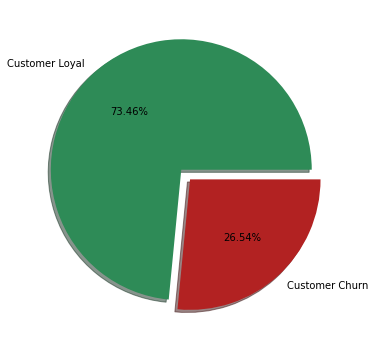

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(x=df["Churn"].value_counts(),
        colors=["seagreen", "firebrick"], 
        labels=["Customer Loyal", "Customer Churn"], 
        shadow = True, 
        autopct="%1.2f%%",
        explode=(0, 0.1)
        )

plt.show()

In [15]:
condition1 = [
              df.MultipleLines != 'Yes',
              df.MultipleLines == 'Yes'
             ]
condition2 = [
              df.OnlineSecurity != 'Yes',
              df.OnlineSecurity == 'Yes'
             ]
condition3 = [
              df.OnlineBackup != 'Yes',
              df.OnlineBackup == 'Yes'
             ]

condition4 = [
              df.DeviceProtection != 'Yes',
              df.DeviceProtection == 'Yes'
             ]
condition5 = [
              df.TechSupport != 'Yes',
              df.TechSupport == 'Yes'
             ]
condition6 = [
              df.StreamingTV != 'Yes',
              df.StreamingTV == 'Yes'
             ]
condition7 = [
              df.StreamingMovies != 'Yes',
              df.StreamingMovies == 'Yes'
             ]

label1 = ['No', 'Yes']
label2 = ['No', 'Yes']
label3 = ['No', 'Yes']
label4 = ['No', 'Yes']
label5 = ['No', 'Yes']
label6 = ['No', 'Yes']
label7 = ['No', 'Yes']

df['MultipleLines'] = np.select(condition1, label1)
df.MultipleLines.value_counts()
df['OnlineSecurity'] = np.select(condition2, label2)
df.OnlineSecurity.value_counts()
df['OnlineBackup'] = np.select(condition3, label3)
df.OnlineBackup.value_counts()
df['DeviceProtection'] = np.select(condition4, label4)
df.DeviceProtection.value_counts()
df['TechSupport'] = np.select(condition5, label5)
df.TechSupport.value_counts()
df['StreamingTV'] = np.select(condition6, label6)
df.StreamingTV.value_counts()
df['StreamingMovies'] = np.select(condition7, label7)
df.StreamingMovies.value_counts()

df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [16]:
df.gender.value_counts()
# 0 = Laki-laki
# 1 = Perempuan

Male      3555
Female    3488
Name: gender, dtype: int64

In [17]:
print ('Total Laki-laki\t: {}'.format(df.gender.value_counts()['Male']))
print ('Total Perempuan\t: {}'.format(df.gender.value_counts()['Female']))

Total Laki-laki	: 3555
Total Perempuan	: 3488


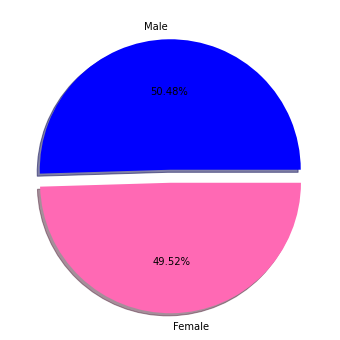

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(x=df["gender"].value_counts(), 
        colors=["blue", "hotpink"], 
        labels=["Male", "Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode=(0, 0.1)
        )

plt.show()

In [19]:
# Grouping
group = df.groupby('gender').Churn.value_counts()
gender_status = pd.crosstab(df.gender, df.Churn)

print(group)
gender_status

gender  Churn
Female  0        2549
        1         939
Male    0        2625
        1         930
Name: Churn, dtype: int64


Churn,0,1
gender,,
Female,2549,939
Male,2625,930


## 1.3 Feature Selection

In [20]:
# Mengetahui kolom apa saja yang termasuk fitur (variabel) numerik/kategoris
numerical_features = df.select_dtypes(include="number").columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)
print("\nCategorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

Categorical features:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
 'PaperlessBilling', 'PaymentMethod']


In [21]:
columns = df.columns
print("********** Numeric field **********n")
for i in range(len(columns)):
    if df[columns[i]].dtypes!=object:
        print("Unique of {} -> {}".format(columns[i], len(df[columns[i]].unique())))
        
print("\n********** Categorical field **********n")
for i in range(len(columns)):
    if df[columns[i]].dtypes==object:
        print("Unique of {} -> {}".format(columns[i], len(df[columns[i]].unique())))

********** Numeric field **********n
Unique of SeniorCitizen -> 2
Unique of tenure -> 73
Unique of MonthlyCharges -> 1585
Unique of TotalCharges -> 6531
Unique of Churn -> 2

********** Categorical field **********n
Unique of gender -> 2
Unique of Partner -> 2
Unique of Dependents -> 2
Unique of PhoneService -> 2
Unique of MultipleLines -> 2
Unique of InternetService -> 3
Unique of OnlineSecurity -> 2
Unique of OnlineBackup -> 2
Unique of DeviceProtection -> 2
Unique of TechSupport -> 2
Unique of StreamingTV -> 2
Unique of StreamingMovies -> 2
Unique of Contract -> 3
Unique of PaperlessBilling -> 2
Unique of PaymentMethod -> 4


In [22]:
for i in range(len(numerical_features)):
    print("********** {} **********".format(numerical_features[i]))
    print(df[numerical_features[i]].unique(), "\n")

********** SeniorCitizen **********
[0 1] 

********** tenure **********
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

********** MonthlyCharges **********
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ] 

********** TotalCharges **********
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ] 

********** Churn **********
[0 1] 



In [23]:
for i in range(len(categorical_features)):
    print("********** {} **********".format(categorical_features[i]))
    print(df[categorical_features[i]].unique(), "\n")

********** gender **********
['Female' 'Male'] 

********** Partner **********
['Yes' 'No'] 

********** Dependents **********
['No' 'Yes'] 

********** PhoneService **********
['No' 'Yes'] 

********** MultipleLines **********
['No' 'Yes'] 

********** InternetService **********
['DSL' 'Fiber optic' 'No'] 

********** OnlineSecurity **********
['No' 'Yes'] 

********** OnlineBackup **********
['Yes' 'No'] 

********** DeviceProtection **********
['No' 'Yes'] 

********** TechSupport **********
['No' 'Yes'] 

********** StreamingTV **********
['No' 'Yes'] 

********** StreamingMovies **********
['No' 'Yes'] 

********** Contract **********
['Month-to-month' 'One year' 'Two year'] 

********** PaperlessBilling **********
['Yes' 'No'] 

********** PaymentMethod **********
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 



In [24]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '').str.strip()

<ipython-input-24-87e22d644f4b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '').str.strip()
<ipython-input-24-87e22d644f4b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['PaymentMethod'] = df['PaymentMethod'].str.replace('(automatic)', '').str.replace('(', '').str.replace(')', '').str.strip()


## 1.4 Correlation

> [Referensi Korelasi Data](https://www.scribbr.com/statistics/pearson-correlation-coefficient/)

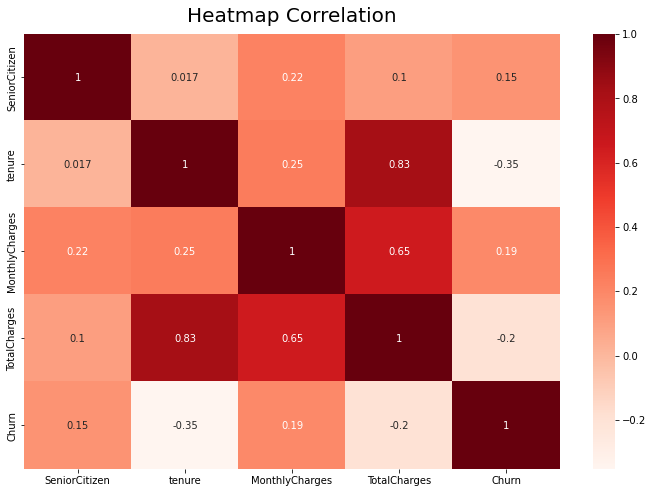

In [25]:
plt.subplots(figsize=(12, 8))
heatmap = sns.heatmap(df.corr(), annot = True, cmap=plt.cm.Reds)
heatmap.set_title('Heatmap Correlation', fontdict={'fontsize':20}, pad=12);

Text(0.5, 0, 'TotalCharges')

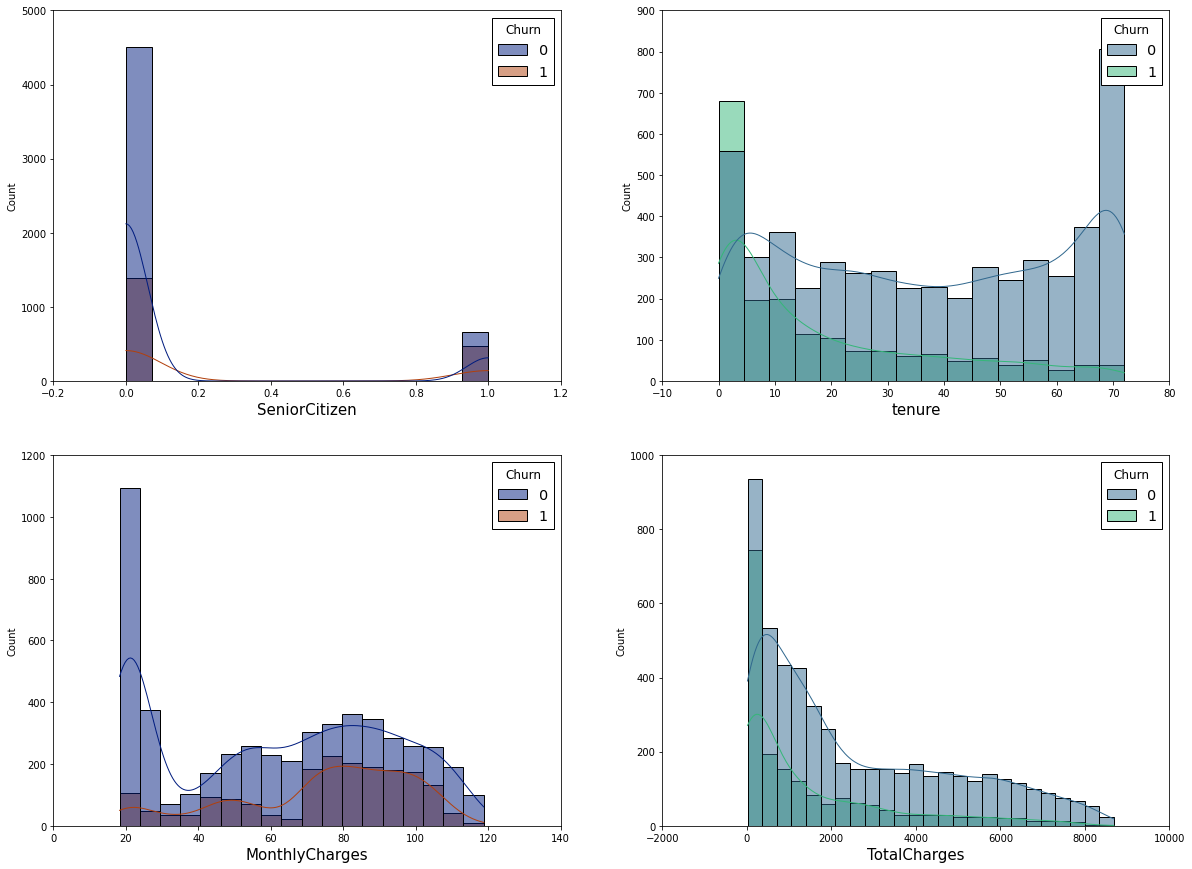

In [26]:
# Numerical Feature Visualization
fig, ax=plt.subplots(2, 2, figsize=(20, 15)) 
plt.style.use("classic")

sns.histplot(x=df["SeniorCitizen"], hue=df["Churn"], palette="dark", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("SeniorCitizen", fontsize=15)
sns.histplot(x=df["tenure"], hue=df["Churn"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("tenure", fontsize=15)
sns.histplot(x=df["MonthlyCharges"], hue=df["Churn"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("MonthlyCharges", fontsize=15)
sns.histplot(x=df["TotalCharges"], hue=df["Churn"], palette="viridis", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("TotalCharges", fontsize=15)

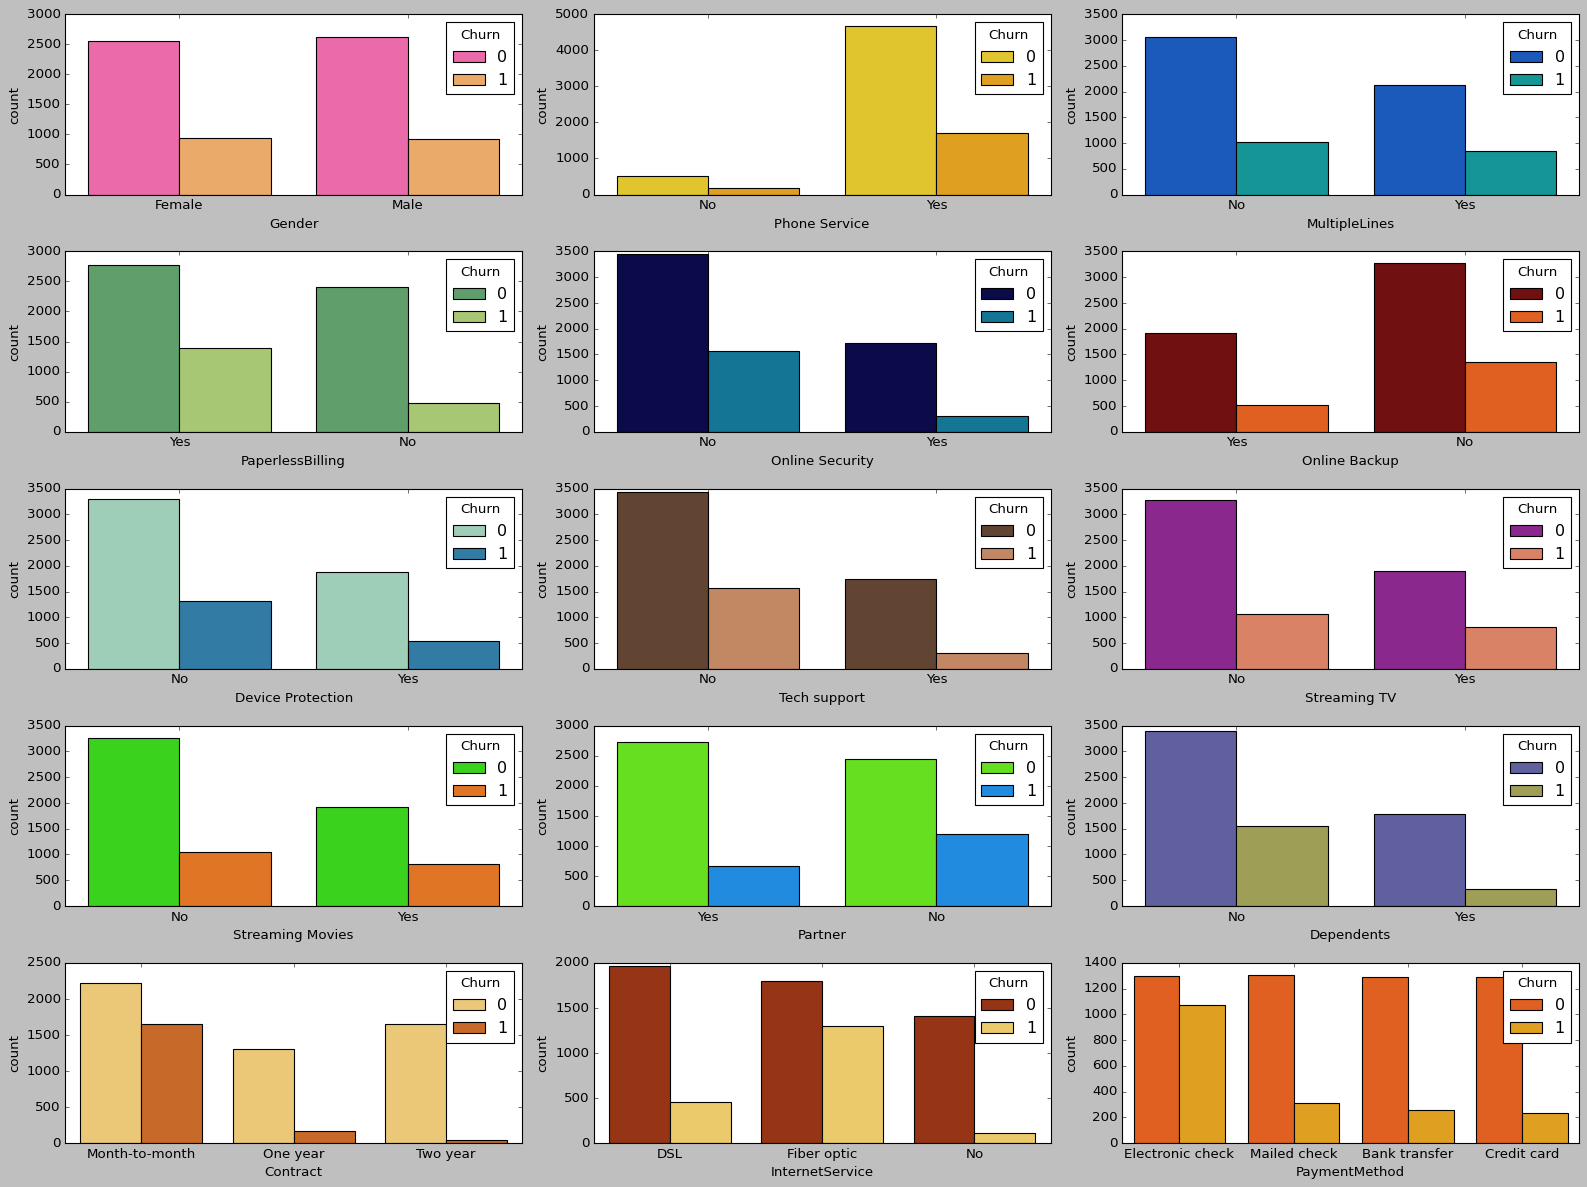

In [27]:
# Categorical Feature Visualization
fig, ax = plt.subplots(5, 3, figsize = (20, 15))

ax1 = sns.countplot(x='gender', data=df, hue='Churn', ax=ax[0, 0], palette='spring')
ax1.set(xlabel='Gender')
ax2 = sns.countplot(x='PhoneService', data=df, hue='Churn', ax=ax[0, 1], palette='Wistia')
ax2.set(xlabel='Phone Service')
ax3 = sns.countplot(x='MultipleLines', data=df, hue='Churn', ax=ax[0, 2], palette='winter')
ax3.set(xlabel='MultipleLines')
ax4 = sns.countplot(x='PaperlessBilling', data=df, hue='Churn', ax=ax[1, 0], palette='summer')
ax4.set(xlabel='PaperlessBilling')
ax5 = sns.countplot(x='OnlineSecurity', data=df, hue='Churn', ax=ax[1, 1], palette='ocean')
ax5.set(xlabel='Online Security')
ax6 = sns.countplot(x='OnlineBackup', data=df, hue='Churn', ax=ax[1, 2], palette='gist_heat')
ax6.set(xlabel='Online Backup')
ax7 = sns.countplot(x='DeviceProtection', data=df, hue='Churn', ax=ax[2, 0], palette='YlGnBu')
ax7.set(xlabel='Device Protection')
ax8 = sns.countplot(x='TechSupport', data=df, hue='Churn', ax=ax[2, 1], palette='copper')
ax8.set(xlabel='Tech support')
ax9 = sns.countplot(x='StreamingTV', data=df, hue='Churn', ax=ax[2, 2], palette='plasma')
ax9.set(xlabel='Streaming TV')
ax10 = sns.countplot(x='StreamingMovies', data=df, hue='Churn', ax=ax[3, 0], palette='gist_ncar')
ax10.set(xlabel='Streaming Movies')
ax11 = sns.countplot(x='Partner', data=df, hue='Churn', ax=ax[3, 1], palette='gist_rainbow')
ax11.set(xlabel='Partner')
ax12 = sns.countplot(x='Dependents', data=df, hue='Churn', ax=ax[3, 2], palette='gist_stern')
ax12.set(xlabel='Dependents')
ax13 = sns.countplot(x='Contract', data=df, hue='Churn', ax=ax[4, 0], palette='YlOrBr')
ax13.set(xlabel='Contract')
ax14 = sns.countplot(x='InternetService', data=df, hue='Churn', ax=ax[4, 1], palette='afmhot')
ax14.set(xlabel='InternetService')
ax15 = sns.countplot(x='PaymentMethod', data=df, hue='Churn', ax=ax[4, 2], palette='autumn')
ax15.set(xlabel='PaymentMethod')

plt.tight_layout()
plt.show()

## 1.5 Outlier

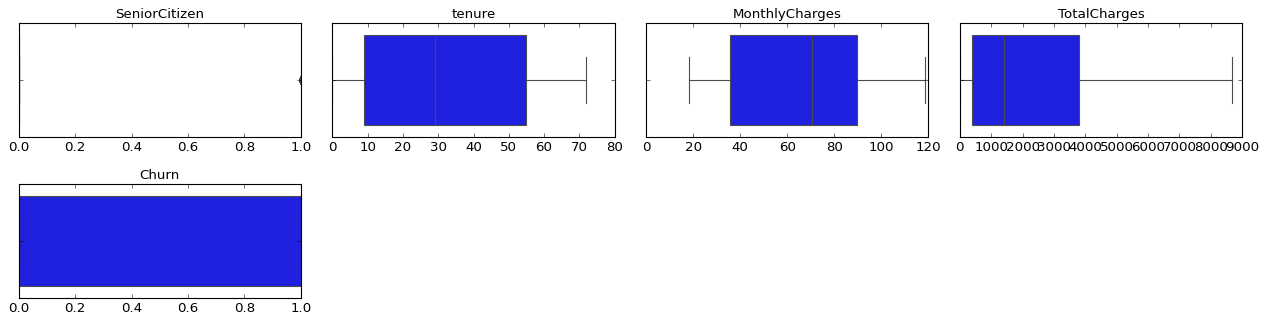

In [28]:
# Numerical Features
plt.figure(figsize=(16, 8), facecolor='white')
plotnumber = 1
    
for feature in numerical_features:
    ax = plt.subplot(4, 4, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.xlabel(None)
    plt.tight_layout()
    plotnumber += 1

> Ada beberapa cara untuk menghilangkan outliers.
* Mengganti nilai outliers menggunakan nilai lower bound dan upper bound.
* Capping menggunakan nilai median
* Capping menggunakan nilai mean
* Capping menggunakan nilai modus

> **Referensi:** [handling outlier](https://blog.sanbercode.com/docs/materi-eda/data-type-missing-value-outlier/)

In [29]:
# # Membuat function IQR Detection
# def outlier(data):
#     q1 = data.quantile(0.25)
#     q3 = data.quantile(0.75)
#     iqr = q3 - q1
#     limit = iqr * 1.5
#     print(f'IQR: {iqr}')
#     upperlimit = q3 + limit
#     lowerlimit = q1 - limit
#     print(f'Upper Limit\t: {upperlimit}')
#     print(f'Lower Limit\t: {lowerlimit}')

# # Buang Outlier
# outlier_feature = [
#                    'tenure',
#                    'MonthlyCharges',
#                    'TotalCharges'
#                   ]

# for i in outlier_feature:
#     print(i)
#     outlier(df[i])
#     print()

# df = df[
#         (df['tenure'] < 125.0) & 
#         (df['MonthlyCharges'] < 172) &
#         (df['TotalCharges'] < 8888)
#        ]

In [30]:
# # Clean dataframe from outlier
# df = df.drop_duplicates()
# df.info()

# 2. Categorical Encoding

> **Note:** Jenis-Jenis Tipe Data
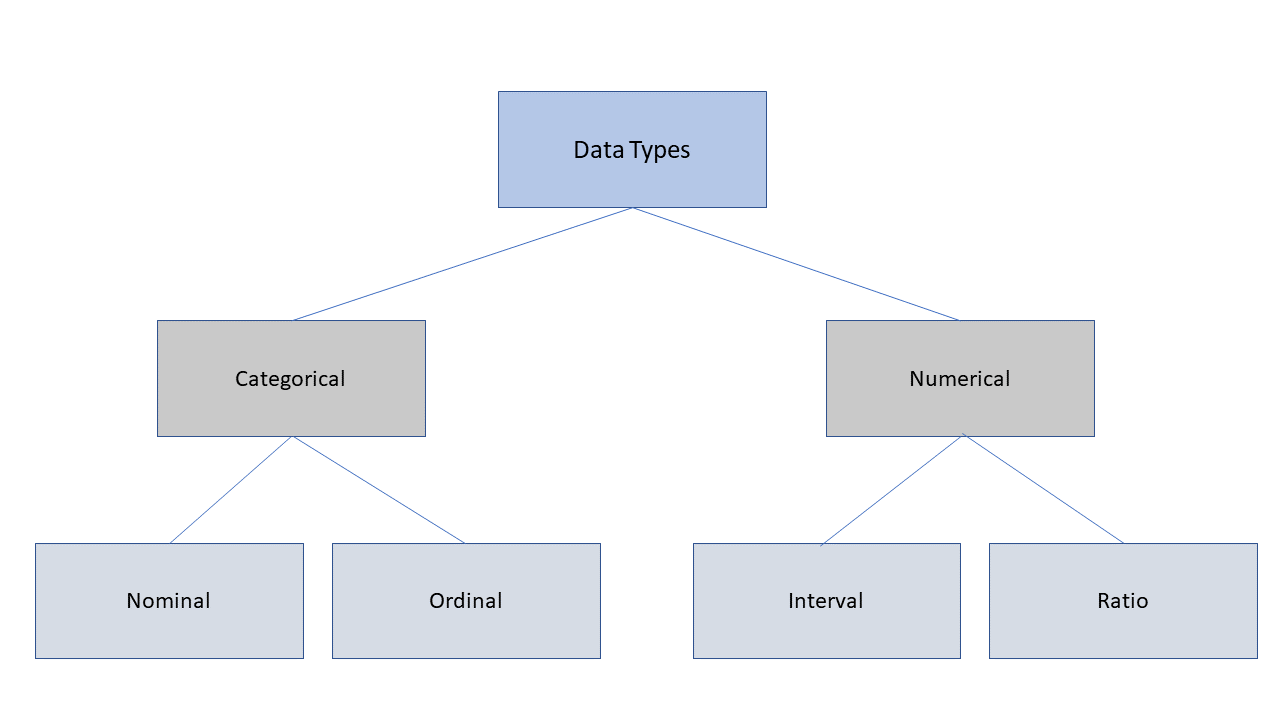

1. Data Nominal: Data nominal adalah data yang dapat diklasifikasikan ke dalam kategori atau label tanpa urutan tertentu. Contoh: jenis kelamin (Pria/Wanita), warna (Merah/Biru/Hijau), dll.
2. Data Ordinal: Data ordinal adalah data yang dapat diklasifikasikan ke dalam kategori atau label dengan urutan tertentu. Contoh: tingkat pendidikan (SD/SMP/SMA/Perguruan Tinggi), tingkat kesukaan (Sangat Tidak Suka/Tidak Suka/Netral/Suka/Sangat Suka), dll.
3. Data Interval: Data interval adalah data yang dapat diukur dalam skala yang tidak terbatas namun tidak memiliki nilai nol absolut. Contoh: suhu dalam derajat Fahrenheit, skala IQ, dll.
4. Data Rasio: Data rasio adalah data yang dapat diukur dalam skala yang tidak terbatas dan memiliki nilai nol absolut. Contoh: berat badan, tinggi badan, dll.

> **NOTE:**
> Perbedaan utama antara tipe data tersebut terletak pada cara data diukur dan diinterpretasikan. Data nominal hanya dapat di klasifikasikan, data ordinal memiliki urutan, data interval tidak memiliki nilai nol absolut, sementara data rasio memiliki nilai nol absolut sehingga dapat diukur perbandingannya.

1. Data kontinu: Data kontinu adalah data yang dapat diukur dalam skala yang tidak terbatas, seperti suhu, berat, tinggi, dll. Data ini dapat dinyatakan dalam bentuk angka decimal. Contoh : suhu tubuh, berat badan, tinggi badan, dll.
2. Data diskrit: Data diskrit adalah data yang dapat dihitung dan dinyatakan dalam bentuk angka bulat. Data diskrit dapat diklasifikasikan ke dalam kategori atau label. Contoh : jumlah anak, jenis kelamin, jenis pekerjaan, dll.
3. Data binari: Data binari adalah data yang hanya dapat memiliki dua nilai, yaitu 0 atau 1. Data ini sering digunakan dalam klasifikasi biner (binary classification), dimana setiap sampel diklasifikasikan sebagai kategori positif atau negatif. Contoh : status menikah (Menikah/Belum Menikah), status memiliki kartu kredit (ya/tidak), dll.

> **NOTE:**
> Perbedaan utama antara data kontinu, diskrit dan binari terletak pada cara data diukur dan diinterpretasikan. Data kontinu diukur dalam skala yang tidak terbatas, data diskrit diukur dalam skala yang terbatas dan dapat dihitung, sementara data binari hanya memiliki dua nilai yang mungkin.

* Dilihat dari isi value masing-masing fitur, maka encoding akan terbagi menjadi 2 yaitu: 
> 1. ***Ordinal Encoding*** untuk fitur kategorik tipe data ordinal.
> 2. ***One Hot Encoding*** untuk fitur kategorik tipe data nominal, interval, dan rasio.

In [31]:
numeric_data = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
# Untuk Uji One Hot Encoding
nominal_data = ['gender', 'InternetService', 'PaymentMethod']
# Untuk Uji Label Encoding
ordinal_data = df.select_dtypes(include="object").drop(columns=nominal_data).columns.tolist()

print("Numeric Data:")
pprint(numeric_data)
print("\nNominal Data:")
pprint(nominal_data)
print("\nOrdinal Data:")
pprint(ordinal_data, compact=True)

Numeric Data:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Nominal Data:
['gender', 'InternetService', 'PaymentMethod']

Ordinal Data:
['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
 'StreamingMovies', 'Contract', 'PaperlessBilling']


## 2.1 Label Encoding

In [32]:
# Encoding pada ordinal features
labelencoder = LabelEncoder()
df['Partner'] = labelencoder.fit_transform(df['Partner'])
df['Dependents'] = labelencoder.fit_transform(df['Dependents'])
df['PhoneService'] = labelencoder.fit_transform(df['PhoneService'])
df['MultipleLines'] = labelencoder.fit_transform(df['MultipleLines'])
df['OnlineSecurity'] = labelencoder.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = labelencoder.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = labelencoder.fit_transform(df['DeviceProtection'])
df['TechSupport'] = labelencoder.fit_transform(df['TechSupport'])
df['StreamingTV'] = labelencoder.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = labelencoder.fit_transform(df['StreamingMovies'])
df['Contract'] = labelencoder.fit_transform(df['Contract'])
df['PaperlessBilling'] = labelencoder.fit_transform(df['PaperlessBilling'])

# Menampilkan DataFrame hasil ordinal encoding
print("Label Encoding:")
display(df)

Label Encoding:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,0,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,1,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,0,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,1,0,Bank transfer,42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,1,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,1,1,Credit card,103.20,7362.90,0
7040,Female,0,1,1,11,0,0,DSL,1,0,0,0,0,0,0,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,0,1,Mailed check,74.40,306.60,1


## 2.2 One Hot Encoding

In [33]:
# Creating one hot encoding with pandas get dummy
encoding = pd.get_dummies(df, nominal_data)
encoding.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,1,1,0,0,0,0,0,1
3,0,0,0,45,0,0,1,0,1,1,...,0,0,1,1,0,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0


In [34]:
encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SeniorCitizen                   7043 non-null   int64  
 1   Partner                         7043 non-null   int64  
 2   Dependents                      7043 non-null   int64  
 3   tenure                          7043 non-null   int64  
 4   PhoneService                    7043 non-null   int64  
 5   MultipleLines                   7043 non-null   int64  
 6   OnlineSecurity                  7043 non-null   int64  
 7   OnlineBackup                    7043 non-null   int64  
 8   DeviceProtection                7043 non-null   int64  
 9   TechSupport                     7043 non-null   int64  
 10  StreamingTV                     7043 non-null   int64  
 11  StreamingMovies                 7043 non-null   int64  
 12  Contract                        70

# 3. Split Data

In [35]:
# Define variable X (Independent variable / features)
X = encoding.drop('Churn', axis=1)

# Define variable y (Dependent variable / Target features)
Y = encoding["Churn"]

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.2, random_state=42)

* X_train: Untuk menampung data source yang akan dilatih.
* X_test: Untuk menampung data target yang akan dilatih.
* Y_train: Untuk menampung data source yang akan digunakan untuk testing.
* Y_test: Untuk menampung data target yang akan digunakan untuk testing.

In [37]:
len(X_train), len(X_test)

(5634, 1409)

In [38]:
print("Jumlah X Train", X_train.shape)
print("Jumlah X Test", X_test.shape)

Jumlah X Train (5634, 25)
Jumlah X Test (1409, 25)


In [39]:
print("Data Train:")
pprint(Y_train.value_counts())

print("\nData Test:")
pprint(Y_test.value_counts())

Data Train:
0    4138
1    1496
Name: Churn, dtype: int64

Data Test:
0    1036
1     373
Name: Churn, dtype: int64


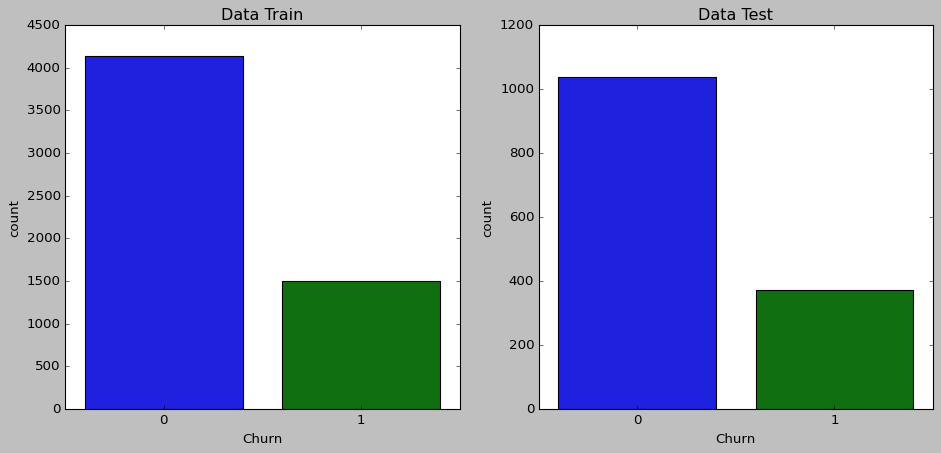

In [40]:
fig, axis = plt.subplots(1, 2, figsize=(14, 6))
for idx, label in enumerate([
    (Y_train, "Data Train"), (Y_test, "Data Test")
]):
    sns.countplot(x=label[0], ax=axis[idx])
    axis[idx].set_title(label[1])
    axis[idx].grid(False)
plt.show()

# 4. Normalization
[Data Preproc](https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-sklearn-data-preprocessing)

In [41]:
mms = MinMaxScaler()

# X_train_scaled = mms.fit_transform(X_train)
# X_test_scaled = mms.transform(X_test)

X_train_scaled = pd.DataFrame(
                               mms.fit_transform(X_train),
                               columns=X_train.columns
                             )

X_test_scaled = pd.DataFrame(
                              mms.transform(X_test),
                              columns=X_test.columns
                            )

In [42]:
print('Max value seen per feature : ', mms.data_max_)
print('\nMinimum value seen per feature : ', mms.data_min_)
print('\nRange seen per feature (data_max_ - data_min_) : ', mms.data_range_)
print('\nPer feature adjustment for minimum (min - X.min(axis=0) * self.scale_)', mms.min_)
print('\nPer feature relative scaling of the data ((max - min) / (X.max(axis=0) - X.min(axis=0)))', mms.scale_)

Max value seen per feature :  [1.0000e+00 1.0000e+00 1.0000e+00 7.2000e+01 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 2.0000e+00 1.0000e+00 1.1860e+02 8.6848e+03 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00]

Minimum value seen per feature :  [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.   18.25 18.8   0.    0.    0.    0.    0.    0.    0.    0.
  0.  ]

Range seen per feature (data_max_ - data_min_) :  [1.0000e+00 1.0000e+00 1.0000e+00 7.2000e+01 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 2.0000e+00 1.0000e+00 1.0035e+02 8.6660e+03 1.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00
 1.0000e+00]

Per feature adjustment for minimum (min - X.min(axis=0) * self.scale_) [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.       

In [43]:
X_train_scaled.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.291667,1.0,0.0,1.0,0.0,1.0,0.0,...,0.152089,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.750000,1.0,1.0,0.0,1.0,0.0,0.0,...,0.589736,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.013889,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000537,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.055556,1.0,0.0,0.0,0.0,0.0,0.0,...,0.025288,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.000000,1.0,1.0,1.0,1.0,0.0,1.0,...,0.159090,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [44]:
X_test_scaled.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.013889,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000692,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.569444,1.0,1.0,0.0,0.0,0.0,0.0,...,0.112814,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.722222,1.0,0.0,0.0,0.0,0.0,0.0,...,0.116882,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.013889,1.0,0.0,0.0,0.0,1.0,0.0,...,0.006641,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.930556,1.0,0.0,0.0,0.0,0.0,1.0,...,0.374025,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# 5. SMOTE

In [45]:
# Define SMOTE Data Train
smote = SMOTE()
X_smote_train, Y_smote_train = smote.fit_resample(X_train_scaled, Y_train)

print('Original dataset shape is', Counter(Y_train))
print('Resample dataset shape is', Counter(Y_smote_train))
print("\n==========")
print(X_smote_train.shape)
print(Y_smote_train.shape)

print("\n********************")

# Define SMOTE Data Test
smote = SMOTE()
X_smote_test, Y_smote_test = smote.fit_resample(X_test_scaled, Y_test)

print('Original dataset shape is', Counter(Y_test))
print('Resample dataset shape is', Counter(Y_smote_test))
print("\n==========")
print(X_smote_test.shape)
print(Y_smote_test.shape)

Original dataset shape is Counter({0: 4138, 1: 1496})
Resample dataset shape is Counter({0: 4138, 1: 4138})

(8276, 25)
(8276,)

********************
Original dataset shape is Counter({0: 1036, 1: 373})
Resample dataset shape is Counter({1: 1036, 0: 1036})

(2072, 25)
(2072,)


# 6. Modelling with Random Forest
Referensi Model Random Forest
1. [Selected Features](https://www.datacamp.com/tutorial/random-forests-classifier-python)
2. [Estimator Tree](https://www.kaggle.com/code/prashant111/random-forest-classifier-feature-importance#Random-Forest-Classifier-with-Feature-Importance)

In [46]:
# Evaluation Metrics
def classification_matrix (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp + tn) / (tp + tn + fp + fn) * 100, 2)
    precision = round((tp) / (tp + fp) * 100, 2)
    recall = round((tp) / (tp + fn) * 100, 2)
    f1_score = round((2 * (precision * recall) / (precision + recall)))
    
    print('Evaluation Model:', name)
    print(cm)
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')
    print('F1_Score   :', f1_score, '%')

## 6.1 Without SMOTE

### 6.1.1 Entropy

#### a. 100 Trees = 79,35%

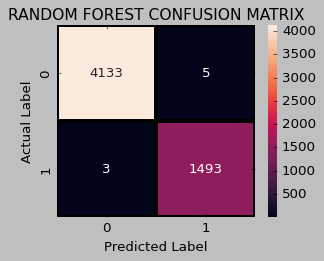


**********



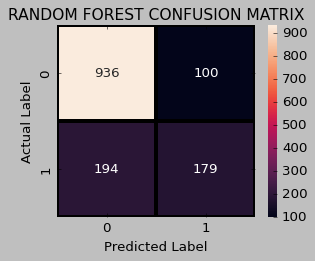


**********

Training Accuracy	: 100
Testing Accuracy	: 79.13


In [47]:
# instantiate the classifier with n_estimators = 100
entropy_rfc_100 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

# fit the model to the training set
entropy_rfc_100.fit(X_train_scaled, Y_train)

# Predict on the test set results
Y_train_rfc_100 = entropy_rfc_100.predict(X_train_scaled)
Y_test_rfc_100 = entropy_rfc_100.predict(X_test_scaled)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, Y_train_rfc_100),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, Y_test_rfc_100),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(entropy_rfc_100.score(X_train_scaled, Y_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(entropy_rfc_100.score(X_test_scaled, Y_test)*100))

In [48]:
classification_matrix(Y_train, Y_train_rfc_100, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4133    5]
 [   3 1493]]
Accuracy   : 99.86 %
Precision  : 99.67 %
Recall     : 99.8 %
F1_Score   : 100 %


In [49]:
print(metrics.classification_report(Y_train, Y_train_rfc_100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [50]:
classification_matrix(Y_test, Y_test_rfc_100, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[936 100]
 [194 179]]
Accuracy   : 79.13 %
Precision  : 64.16 %
Recall     : 47.99 %
F1_Score   : 55 %


In [51]:
print(metrics.classification_report(Y_test, Y_test_rfc_100))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



#### b. 200 Trees = 79,42% 

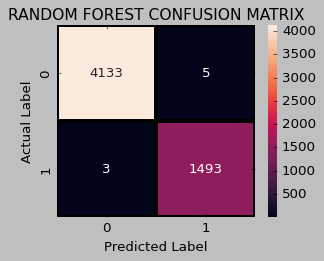


**********



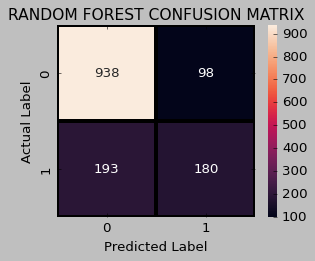


**********

Training Accuracy	: 100
Testing Accuracy	: 79.35


In [52]:
# instantiate the classifier with n_estimators = 200
entropy_rfc_200 = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)

# fit the model to the training set
entropy_rfc_200.fit(X_train_scaled, Y_train)

# Predict on the test set results
Y_train_rfc_200 = entropy_rfc_200.predict(X_train_scaled)
Y_test_rfc_200 = entropy_rfc_200.predict(X_test_scaled)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, Y_train_rfc_200),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, Y_test_rfc_200),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(entropy_rfc_200.score(X_train_scaled, Y_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(entropy_rfc_200.score(X_test_scaled, Y_test)*100))

In [53]:
classification_matrix(Y_train, Y_train_rfc_200, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4133    5]
 [   3 1493]]
Accuracy   : 99.86 %
Precision  : 99.67 %
Recall     : 99.8 %
F1_Score   : 100 %


In [54]:
print(metrics.classification_report(Y_train, Y_train_rfc_200))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [55]:
classification_matrix(Y_test, Y_test_rfc_200, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[938  98]
 [193 180]]
Accuracy   : 79.35 %
Precision  : 64.75 %
Recall     : 48.26 %
F1_Score   : 55 %


In [56]:
print(metrics.classification_report(Y_test, Y_test_rfc_200))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



#### c. 500 Trees = 79,42%

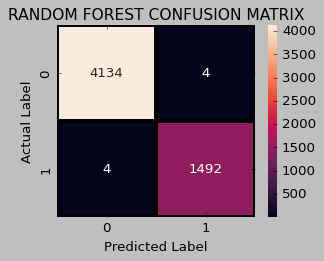


**********



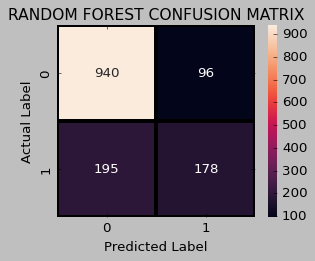


**********

Training Accuracy	: 100
Testing Accuracy	: 79.35


In [57]:
# instantiate the classifier with n_estimators = 500
entropy_rfc_500 = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0)

# fit the model to the training set
entropy_rfc_500.fit(X_train_scaled, Y_train)

# Predict on the test set results
Y_train_rfc_500 = entropy_rfc_500.predict(X_train_scaled)
Y_test_rfc_500 = entropy_rfc_500.predict(X_test_scaled)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, Y_train_rfc_500),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, Y_test_rfc_500),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(entropy_rfc_500.score(X_train_scaled, Y_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(entropy_rfc_500.score(X_test_scaled, Y_test)*100))

In [58]:
classification_matrix(Y_train, Y_train_rfc_500, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4134    4]
 [   4 1492]]
Accuracy   : 99.86 %
Precision  : 99.73 %
Recall     : 99.73 %
F1_Score   : 100 %


In [59]:
print(metrics.classification_report(Y_train, Y_train_rfc_500))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [60]:
classification_matrix(Y_test, Y_test_rfc_500, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[940  96]
 [195 178]]
Accuracy   : 79.35 %
Precision  : 64.96 %
Recall     : 47.72 %
F1_Score   : 55 %


In [61]:
print(metrics.classification_report(Y_test, Y_test_rfc_500))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



#### d. 1000 Trees = 79,49%

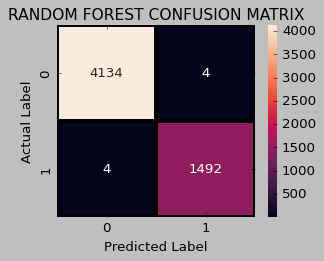


**********



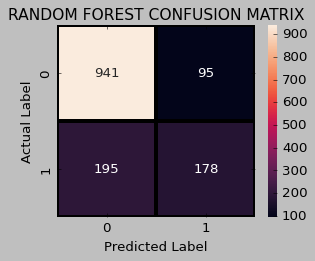


**********

Training Accuracy	: 100
Testing Accuracy	: 79.42


In [62]:
# instantiate the classifier with n_estimators = 1000
entropy_rfc_1000 = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=0)

# fit the model to the training set
entropy_rfc_1000.fit(X_train_scaled, Y_train)

# Predict on the test set results
Y_train_rfc_1000 = entropy_rfc_1000.predict(X_train_scaled)
Y_test_rfc_1000 = entropy_rfc_1000.predict(X_test_scaled)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, Y_train_rfc_1000),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, Y_test_rfc_1000),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(entropy_rfc_1000.score(X_train_scaled, Y_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(entropy_rfc_1000.score(X_test_scaled, Y_test)*100))

In [63]:
classification_matrix(Y_train, Y_train_rfc_1000, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4134    4]
 [   4 1492]]
Accuracy   : 99.86 %
Precision  : 99.73 %
Recall     : 99.73 %
F1_Score   : 100 %


In [64]:
print(metrics.classification_report(Y_train, Y_train_rfc_1000))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [65]:
classification_matrix(Y_test, Y_test_rfc_1000, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[941  95]
 [195 178]]
Accuracy   : 79.42 %
Precision  : 65.2 %
Recall     : 47.72 %
F1_Score   : 55 %


In [66]:
print(metrics.classification_report(Y_test, Y_test_rfc_1000))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



#### e. 1500 Trees = 79,56%

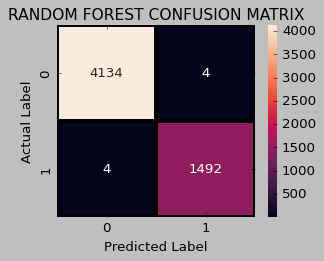


**********



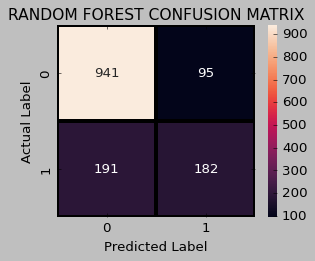


**********

Training Accuracy	: 100
Testing Accuracy	: 79.70


In [67]:
# instantiate the classifier with n_estimators = 1500
entropy_rfc_1500 = RandomForestClassifier(n_estimators=1500, criterion='entropy', random_state=0)

# fit the model to the training set
entropy_rfc_1500.fit(X_train_scaled, Y_train)

# Predict on the test set results
Y_train_rfc_1500 = entropy_rfc_1500.predict(X_train_scaled)
Y_test_rfc_1500 = entropy_rfc_1500.predict(X_test_scaled)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, Y_train_rfc_1500),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, Y_test_rfc_1500),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(entropy_rfc_1500.score(X_train_scaled, Y_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(entropy_rfc_1500.score(X_test_scaled, Y_test)*100))

In [68]:
classification_matrix(Y_train, Y_train_rfc_1500, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4134    4]
 [   4 1492]]
Accuracy   : 99.86 %
Precision  : 99.73 %
Recall     : 99.73 %
F1_Score   : 100 %


In [69]:
print(metrics.classification_report(Y_train, Y_train_rfc_1500))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [70]:
classification_matrix(Y_test, Y_test_rfc_1500, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[941  95]
 [191 182]]
Accuracy   : 79.7 %
Precision  : 65.7 %
Recall     : 48.79 %
F1_Score   : 56 %


In [71]:
print(metrics.classification_report(Y_test, Y_test_rfc_1500))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



#### f. 2000 Trees = 79,35%

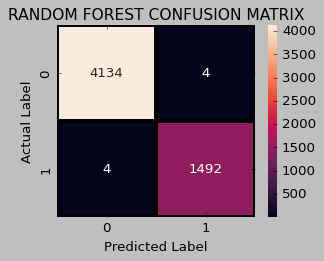


**********



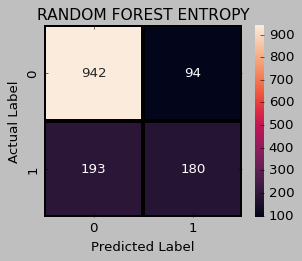


**********

Training Accuracy	: 100
Testing Accuracy	: 79.63


In [72]:
# instantiate the classifier with n_estimators = 2000
entropy_rfc_2000 = RandomForestClassifier(n_estimators=2000, criterion='entropy', random_state=0)

# fit the model to the training set
entropy_rfc_2000.fit(X_train_scaled, Y_train)

# Predict on the test set results
Y_train_rfc_2000 = entropy_rfc_2000.predict(X_train_scaled)
Y_test_rfc_2000 = entropy_rfc_2000.predict(X_test_scaled)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, Y_train_rfc_2000),
            annot=True, 
            fmt="d", 
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, Y_test_rfc_2000),
            annot=True, 
            fmt="d", 
            linecolor="k", 
            linewidths=3
           )
    
plt.title("RANDOM FOREST ENTROPY", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(entropy_rfc_2000.score(X_train_scaled, Y_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(entropy_rfc_2000.score(X_test_scaled, Y_test)*100))

In [73]:
classification_matrix(Y_train, Y_train_rfc_2000, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4134    4]
 [   4 1492]]
Accuracy   : 99.86 %
Precision  : 99.73 %
Recall     : 99.73 %
F1_Score   : 100 %


In [74]:
print(metrics.classification_report(Y_train, Y_train_rfc_2000))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [75]:
classification_matrix(Y_test, Y_test_rfc_2000, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[942  94]
 [193 180]]
Accuracy   : 79.63 %
Precision  : 65.69 %
Recall     : 48.26 %
F1_Score   : 56 %


In [76]:
print(metrics.classification_report(Y_test, Y_test_rfc_2000))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



### 6.1.2 Gini

#### a. 100 Trees = 79,35%

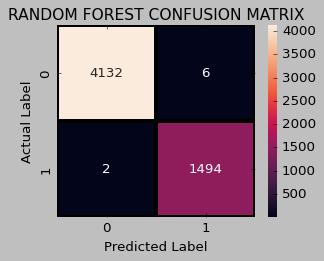


**********



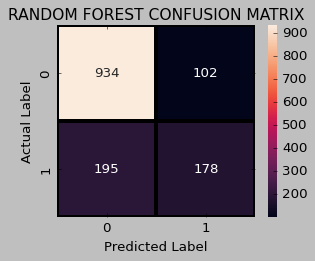


**********

Training Accuracy	: 100
Testing Accuracy	: 78.92


In [77]:
# instantiate the classifier with n_estimators = 100
gini_rfc_100 = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)

# fit the model to the training set
gini_rfc_100.fit(X_train_scaled, Y_train)

# Predict on the test set results
Y_train_rfc_100 = gini_rfc_100.predict(X_train_scaled)
Y_test_rfc_100 = gini_rfc_100.predict(X_test_scaled)


# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, Y_train_rfc_100),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, Y_test_rfc_100),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(gini_rfc_100.score(X_train_scaled, Y_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(gini_rfc_100.score(X_test_scaled, Y_test)*100))

In [78]:
classification_matrix(Y_train, Y_train_rfc_100, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4132    6]
 [   2 1494]]
Accuracy   : 99.86 %
Precision  : 99.6 %
Recall     : 99.87 %
F1_Score   : 100 %


In [79]:
print(metrics.classification_report(Y_train, Y_train_rfc_100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [80]:
classification_matrix(Y_test, Y_test_rfc_100, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[934 102]
 [195 178]]
Accuracy   : 78.92 %
Precision  : 63.57 %
Recall     : 47.72 %
F1_Score   : 55 %


In [81]:
print(metrics.classification_report(Y_test, Y_test_rfc_100))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



#### b. 200 Trees = 79,49%

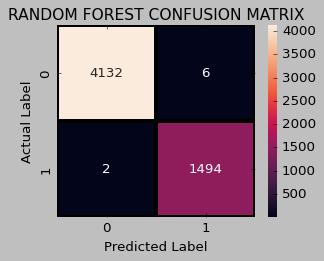


**********



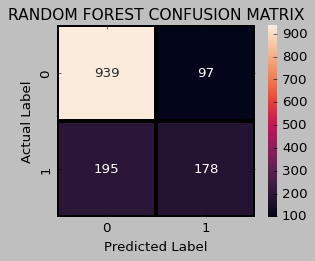


**********

Training Accuracy	: 100
Testing Accuracy	: 79.28


In [82]:
# instantiate the classifier with n_estimators = 200
gini_rfc_200 = RandomForestClassifier(n_estimators=200, criterion='gini', random_state=0)

# fit the model to the training set
gini_rfc_200.fit(X_train_scaled, Y_train)

# Predict on the test set results
Y_train_rfc_200 = gini_rfc_200.predict(X_train_scaled)
Y_test_rfc_200 = gini_rfc_200.predict(X_test_scaled)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, Y_train_rfc_200),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, Y_test_rfc_200),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(gini_rfc_200.score(X_train_scaled, Y_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(gini_rfc_200.score(X_test_scaled, Y_test)*100))

In [83]:
classification_matrix(Y_train, Y_train_rfc_200, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4132    6]
 [   2 1494]]
Accuracy   : 99.86 %
Precision  : 99.6 %
Recall     : 99.87 %
F1_Score   : 100 %


In [84]:
print(metrics.classification_report(Y_train, Y_train_rfc_200))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [85]:
classification_matrix(Y_test, Y_test_rfc_200, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[939  97]
 [195 178]]
Accuracy   : 79.28 %
Precision  : 64.73 %
Recall     : 47.72 %
F1_Score   : 55 %


In [86]:
print(metrics.classification_report(Y_test, Y_test_rfc_200))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



#### c. 500 Trees = 79,42%

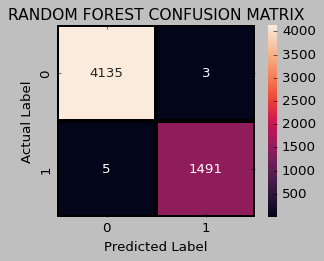


**********



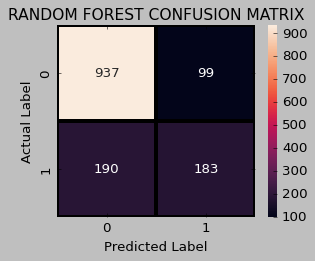


**********

Training Accuracy	: 100
Testing Accuracy	: 79.49


In [87]:
# instantiate the classifier with n_estimators = 500
gini_rfc_500 = RandomForestClassifier(n_estimators=500, criterion='gini', random_state=0)

# fit the model to the training set
gini_rfc_500.fit(X_train_scaled, Y_train)

# Predict on the test set results
Y_train_rfc_500 = gini_rfc_500.predict(X_train_scaled)
Y_test_rfc_500 = gini_rfc_500.predict(X_test_scaled)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, Y_train_rfc_500),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, Y_test_rfc_500),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(gini_rfc_500.score(X_train_scaled, Y_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(gini_rfc_500.score(X_test_scaled, Y_test)*100))

In [88]:
classification_matrix(Y_train, Y_train_rfc_500, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4135    3]
 [   5 1491]]
Accuracy   : 99.86 %
Precision  : 99.8 %
Recall     : 99.67 %
F1_Score   : 100 %


In [89]:
print(metrics.classification_report(Y_train, Y_train_rfc_500))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [90]:
classification_matrix(Y_test, Y_test_rfc_500, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[937  99]
 [190 183]]
Accuracy   : 79.49 %
Precision  : 64.89 %
Recall     : 49.06 %
F1_Score   : 56 %


In [91]:
print(metrics.classification_report(Y_test, Y_test_rfc_500))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



#### d. 1000 Trees = 79,35%

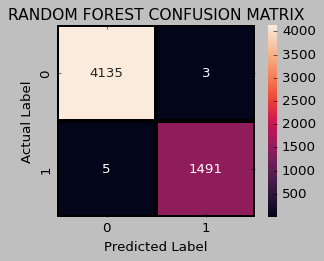


**********



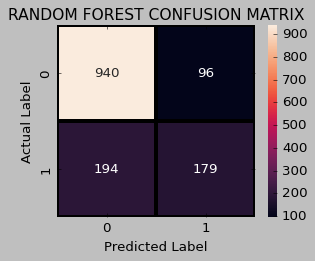


**********

Training Accuracy	: 100
Testing Accuracy	: 79.42


In [92]:
# instantiate the classifier with n_estimators = 1000
gini_rfc_1000 = RandomForestClassifier(n_estimators=1000, criterion='gini', random_state=0)

# fit the model to the training set
gini_rfc_1000.fit(X_train_scaled, Y_train)

# Predict on the test set results
Y_train_rfc_1000 = gini_rfc_1000.predict(X_train_scaled)
Y_test_rfc_1000 = gini_rfc_1000.predict(X_test_scaled)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, Y_train_rfc_1000),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, Y_test_rfc_1000),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(gini_rfc_1000.score(X_train_scaled, Y_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(gini_rfc_1000.score(X_test_scaled, Y_test)*100))

In [93]:
classification_matrix(Y_train, Y_train_rfc_1000, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4135    3]
 [   5 1491]]
Accuracy   : 99.86 %
Precision  : 99.8 %
Recall     : 99.67 %
F1_Score   : 100 %


In [94]:
print(metrics.classification_report(Y_train, Y_train_rfc_1000))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [95]:
classification_matrix(Y_test, Y_test_rfc_1000, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[940  96]
 [194 179]]
Accuracy   : 79.42 %
Precision  : 65.09 %
Recall     : 47.99 %
F1_Score   : 55 %


In [96]:
print(metrics.classification_report(Y_test, Y_test_rfc_1000))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



#### e. 2000 Trees = 79,21%

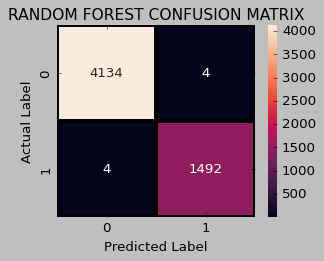


**********



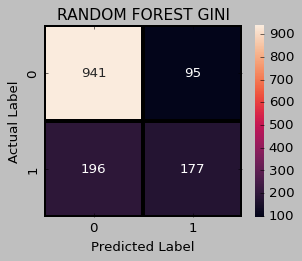


**********

Training Accuracy	: 100
Testing Accuracy	: 79.35


In [97]:
# instantiate the classifier with n_estimators = 2000
gini_rfc_2000 = RandomForestClassifier(n_estimators=2000, criterion='gini', random_state=0)

# fit the model to the training set
gini_rfc_2000.fit(X_train_scaled, Y_train)

# Predict on the test set results
Y_train_rfc_2000 = gini_rfc_2000.predict(X_train_scaled)
Y_test_rfc_2000 = gini_rfc_2000.predict(X_test_scaled)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_train, Y_train_rfc_2000),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_test, Y_test_rfc_2000),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST GINI", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(gini_rfc_2000.score(X_train_scaled, Y_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(gini_rfc_2000.score(X_test_scaled, Y_test)*100))

In [98]:
classification_matrix(Y_train, Y_train_rfc_2000, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4134    4]
 [   4 1492]]
Accuracy   : 99.86 %
Precision  : 99.73 %
Recall     : 99.73 %
F1_Score   : 100 %


In [99]:
print(metrics.classification_report(Y_train, Y_train_rfc_2000))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



In [100]:
classification_matrix(Y_test, Y_test_rfc_2000, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[941  95]
 [196 177]]
Accuracy   : 79.35 %
Precision  : 65.07 %
Recall     : 47.45 %
F1_Score   : 55 %


In [101]:
print(metrics.classification_report(Y_test, Y_test_rfc_2000))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### 6.1.3 Feature Impotances

In [102]:
# view the feature scores
feature_scores = pd.Series(entropy_rfc_1500.feature_importances_, 
                           index=X_smote_train.columns
                          ).sort_values(ascending=False)
feature_scores

TotalCharges                      0.187032
MonthlyCharges                    0.174738
tenure                            0.158075
Contract                          0.082561
InternetService_Fiber optic       0.032508
PaymentMethod_Electronic check    0.029813
PaperlessBilling                  0.026300
Partner                           0.024162
OnlineSecurity                    0.021672
OnlineBackup                      0.021096
Dependents                        0.020340
TechSupport                       0.020307
SeniorCitizen                     0.020171
MultipleLines                     0.019926
StreamingMovies                   0.019027
DeviceProtection                  0.018965
gender_Male                       0.017768
gender_Female                     0.017752
StreamingTV                       0.017242
InternetService_No                0.015730
PaymentMethod_Bank transfer       0.012671
PaymentMethod_Credit card         0.012611
PaymentMethod_Mailed check        0.012044
InternetSer

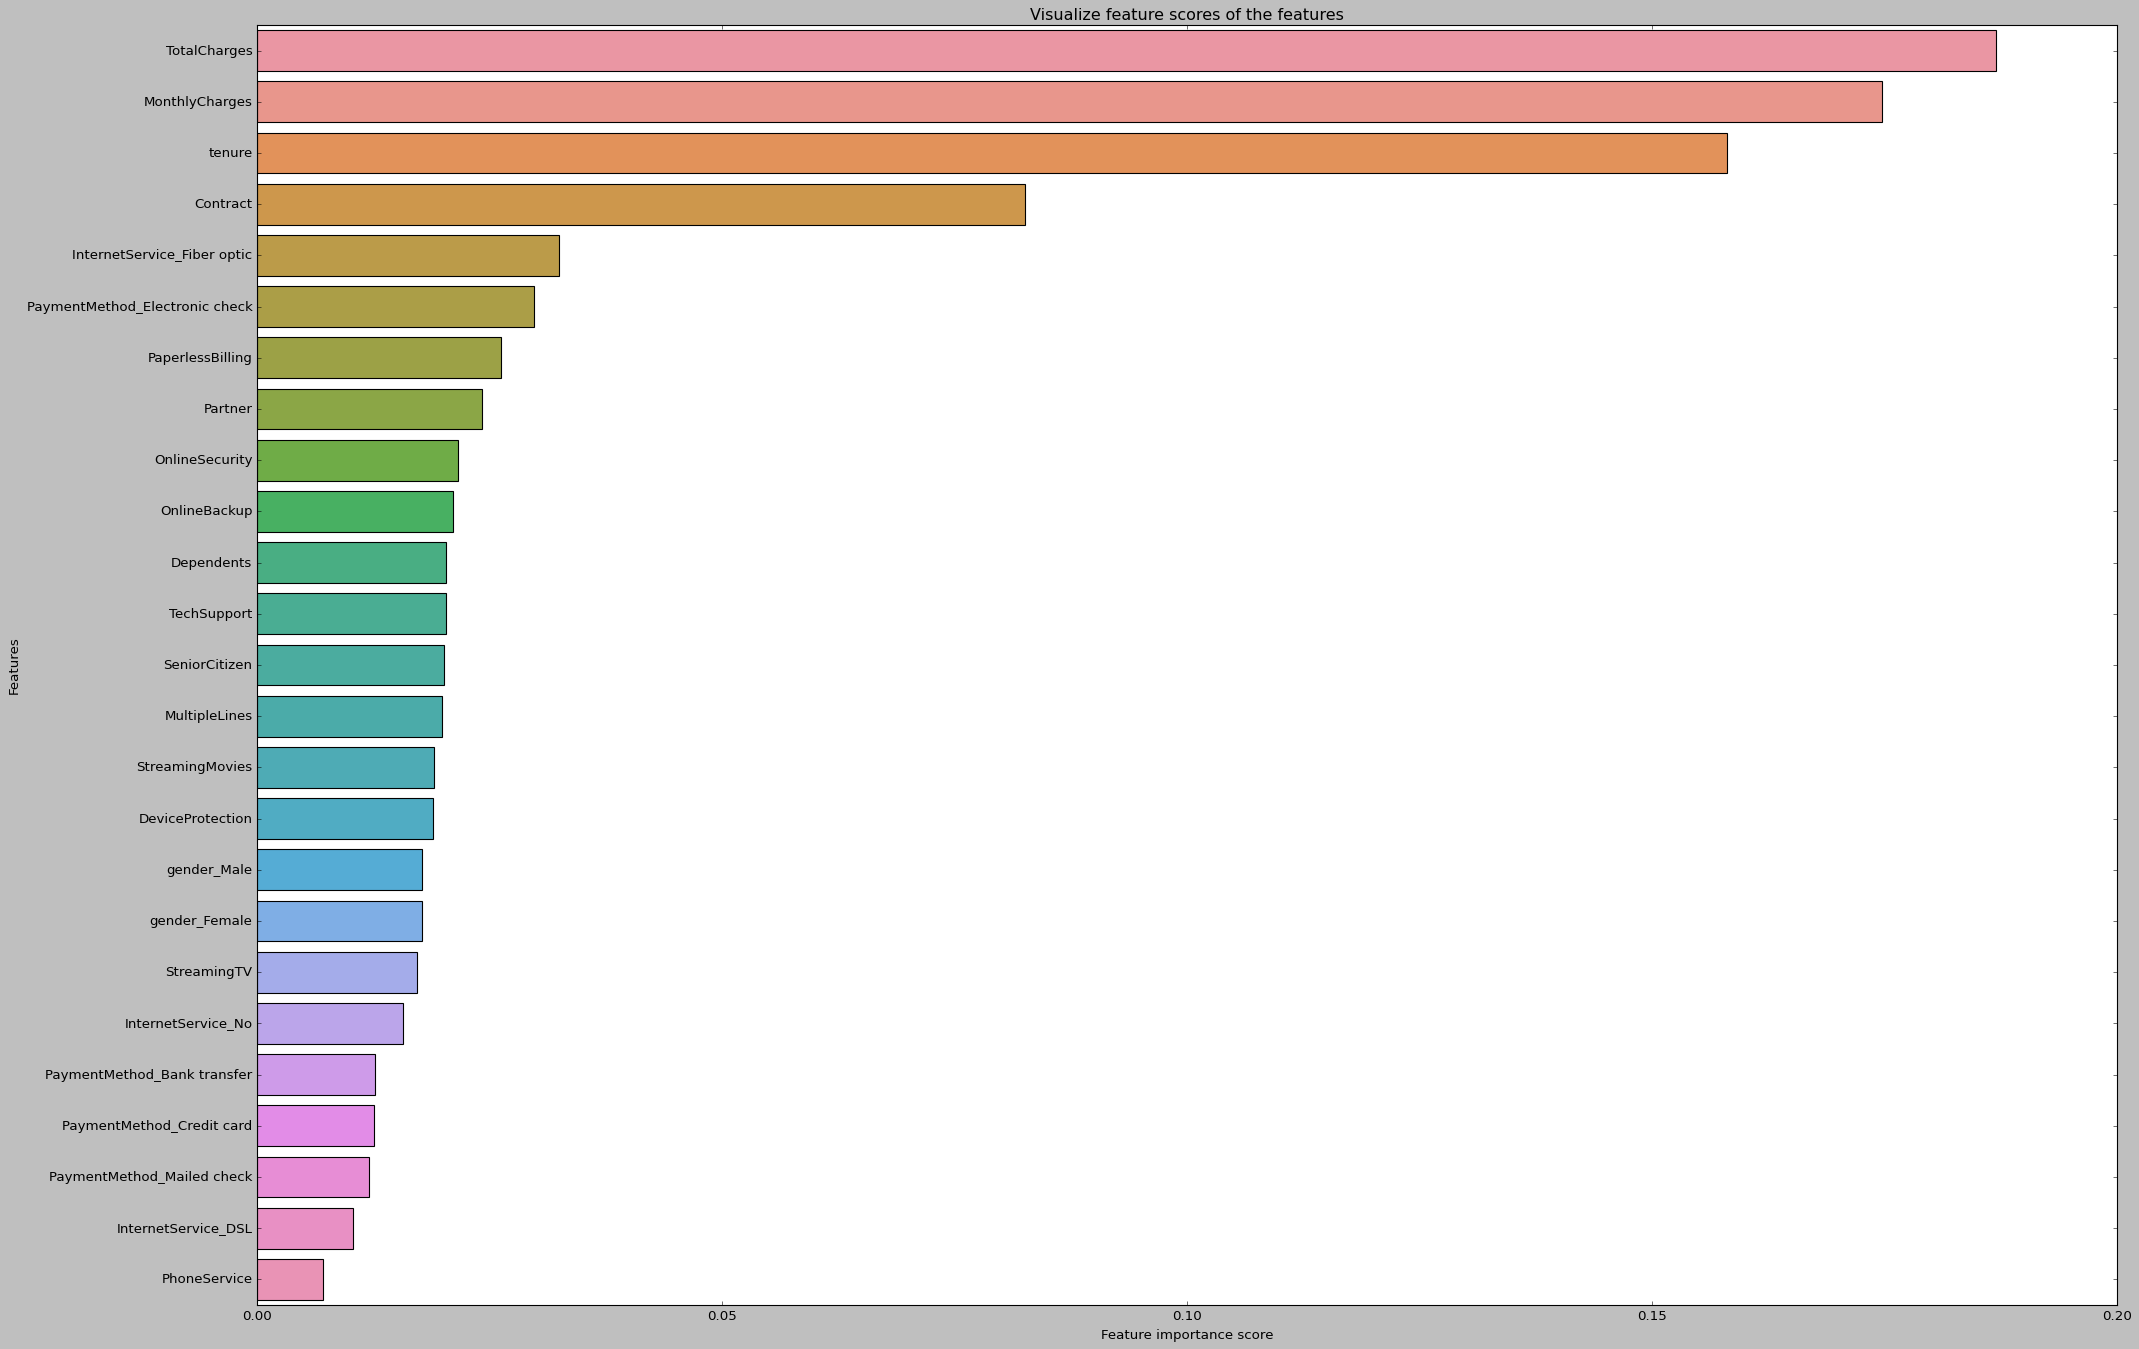

In [103]:
# Creating a seaborn bar plot
fig, ax = plt.subplots(figsize=(30, 20))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## 6.2 With SMOTE

In [104]:
classifier = {
    "LightGBM": lgbm.LGBMClassifier(),
    "XGBoost": XGBClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

In [105]:
train_scores = []
test_scores = []

for key, model in classifier.items():
  model.fit(X_smote_train, Y_smote_train)
  train_score = model.score(X_smote_train, Y_smote_train)
  train_scores.append(train_score)
  test_score = model.score(X_smote_test, Y_smote_test)
  test_scores.append(test_score)

# print("Hasil Nilai Data Train\t:", train_scores)
# print("Hasil Nilai Data Test\t:", test_scores)

In [106]:
klasifikasi = ["LightGBM", "XGBoost", "GradientBoosting", "Random Forest", "Logistic Regression", "Naive Bayes", "Decision Tree", "KNN"]

prediksi = pd.DataFrame({"Nama Model": klasifikasi, "Nilai Data Train": train_scores, "Nilai Data Test": test_scores})
prediksi

,Nama Model,Nilai Data Train,Nilai Data Test
0,LightGBM,0.902489,0.853282
1,XGBoost,0.850411,0.848938
2,GradientBoosting,0.852707,0.848938
3,Random Forest,0.999033,0.812741
4,Logistic Regression,0.777791,0.792471
5,Naive Bayes,0.767400,0.794402
6,Decision Tree,0.999033,0.753378
7,KNN,0.861648,0.722490


### 6.1.1 Test Estimator

#### a. Entropy

In [107]:
from sklearn.ensemble import RandomForestClassifier

entropy = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=0)
entropy.fit(X_smote_train, Y_smote_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [108]:
y_pred_entropy = entropy.predict(X_smote_test)

In [109]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_test, y_pred_entropy)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8146718146718146

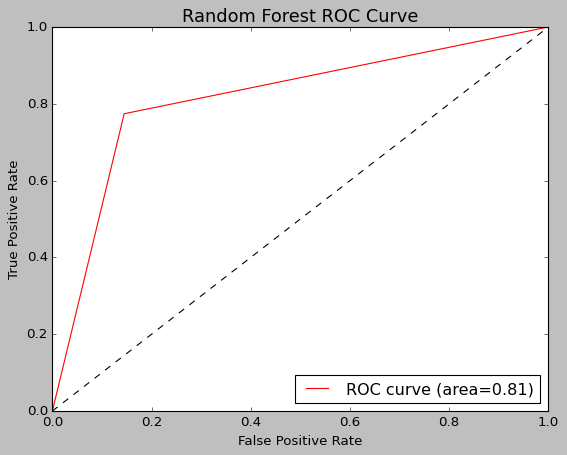

In [110]:
fpr_rf, tpr_rf, thresholds = roc_curve(Y_smote_test, y_pred_entropy, drop_intermediate = False)
auc_score = metrics.roc_auc_score(Y_smote_test, y_pred_entropy)

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, color = "r", label='ROC curve (area=%0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show();

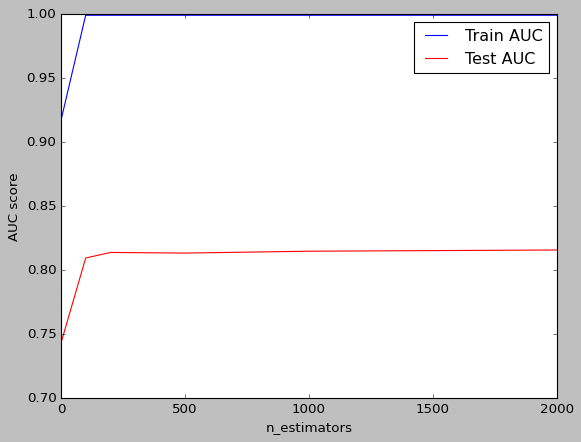

In [111]:
n_estimators = [1, 100, 200, 500, 1000, 2000]
train_results = []
test_results = []

for estimator in n_estimators:
   entropy_rf = RandomForestClassifier(criterion='entropy', random_state=0, n_estimators=estimator, n_jobs=-1)
   entropy_rf.fit(X_smote_train, Y_smote_train)
   
   x_pred_entropy = entropy_rf.predict(X_smote_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_train, x_pred_entropy)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred_entropy = entropy_rf.predict(X_smote_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_test, y_pred_entropy)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

#### b. Gini

In [112]:
from sklearn.ensemble import RandomForestClassifier

gini = RandomForestClassifier(n_estimators=1000, criterion='gini', random_state=0)
gini.fit(X_smote_train, Y_smote_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [113]:
y_pred_gini = gini.predict(X_smote_test)

In [114]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_test, y_pred_gini)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.81515444015444

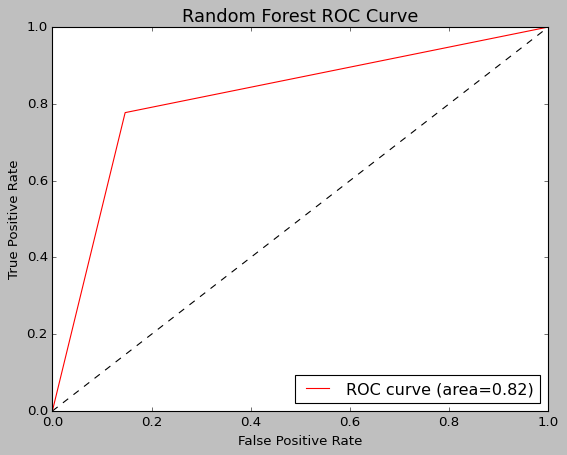

In [115]:
fpr_rf, tpr_rf, thresholds = roc_curve(Y_smote_test, y_pred_gini, drop_intermediate = False)
auc_score = metrics.roc_auc_score(Y_smote_test, y_pred_gini)

plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, color = "r", label='ROC curve (area=%0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show();

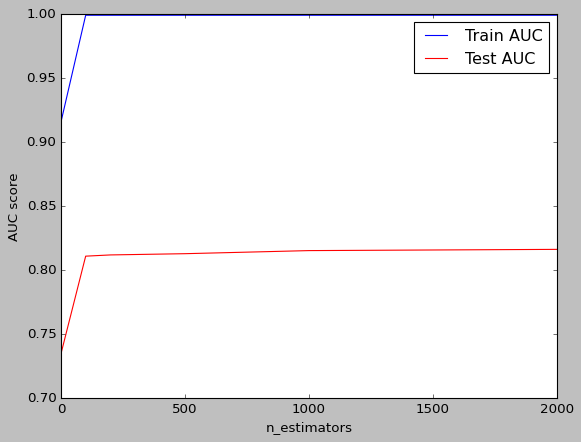

In [116]:
n_estimators = [1, 100, 200, 500, 1000, 2000]
train_results = []
test_results = []

for estimator in n_estimators:
   gini_rf = RandomForestClassifier(criterion='gini', random_state=0, n_estimators=estimator, n_jobs=-1)
   gini_rf.fit(X_smote_train, Y_smote_train)
   
   x_pred_gini = gini_rf.predict(X_smote_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_train, x_pred_gini)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred_gini = gini_rf.predict(X_smote_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_smote_test, y_pred_gini)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

### 6.1.2 Entropy

#### a. 100 Trees = 81,81%

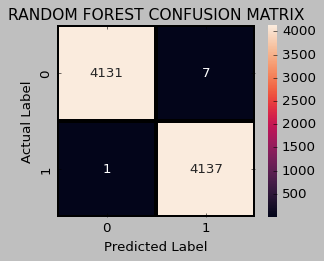


**********



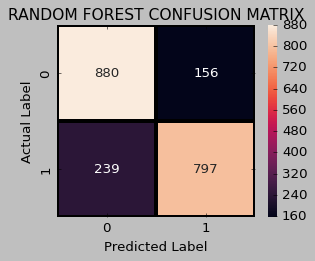


**********

Training Accuracy	: 100
Testing Accuracy	: 80.94


In [117]:
# instantiate the classifier with n_estimators = 100
model_rfc_100 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

# fit the model to the training set
model_rfc_100.fit(X_smote_train, Y_smote_train)

# Predict on the test set results
Y_train_rfc_100 = model_rfc_100.predict(X_smote_train)
Y_test_rfc_100 = model_rfc_100.predict(X_smote_test)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_smote_train, Y_train_rfc_100),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_smote_test, Y_test_rfc_100),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(model_rfc_100.score(X_smote_train, Y_smote_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(model_rfc_100.score(X_smote_test, Y_smote_test)*100))

In [118]:
classification_matrix(Y_smote_train, Y_train_rfc_100, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4131    7]
 [   1 4137]]
Accuracy   : 99.9 %
Precision  : 99.83 %
Recall     : 99.98 %
F1_Score   : 100 %


In [119]:
print(metrics.classification_report(Y_smote_train, Y_train_rfc_100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276



In [120]:
classification_matrix(Y_smote_test, Y_test_rfc_100, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[880 156]
 [239 797]]
Accuracy   : 80.94 %
Precision  : 83.63 %
Recall     : 76.93 %
F1_Score   : 80 %


In [121]:
print(metrics.classification_report(Y_smote_test, Y_test_rfc_100))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1036
           1       0.84      0.77      0.80      1036

    accuracy                           0.81      2072
   macro avg       0.81      0.81      0.81      2072
weighted avg       0.81      0.81      0.81      2072



#### b. 200 Trees = 81,95% 

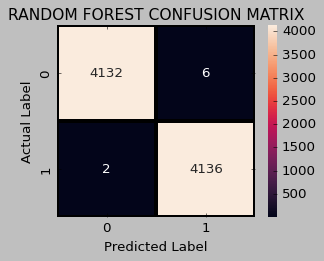


**********



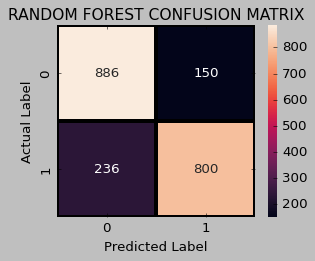


**********

Training Accuracy	: 100
Testing Accuracy	: 81.37


In [122]:
# instantiate the classifier with n_estimators = 200
entropy_rfc_200 = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)

# fit the model to the training set
entropy_rfc_200.fit(X_smote_train, Y_smote_train)

# Predict on the test set results
Y_train_rfc_200 = entropy_rfc_200.predict(X_smote_train)
Y_test_rfc_200 = entropy_rfc_200.predict(X_smote_test)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_smote_train, Y_train_rfc_200),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_smote_test, Y_test_rfc_200),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(entropy_rfc_200.score(X_smote_train, Y_smote_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(entropy_rfc_200.score(X_smote_test, Y_smote_test)*100))

In [123]:
classification_matrix(Y_smote_train, Y_train_rfc_200, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4132    6]
 [   2 4136]]
Accuracy   : 99.9 %
Precision  : 99.86 %
Recall     : 99.95 %
F1_Score   : 100 %


In [124]:
print(metrics.classification_report(Y_smote_train, Y_train_rfc_200))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276



In [125]:
classification_matrix(Y_smote_test, Y_test_rfc_200, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[886 150]
 [236 800]]
Accuracy   : 81.37 %
Precision  : 84.21 %
Recall     : 77.22 %
F1_Score   : 81 %


In [126]:
print(metrics.classification_report(Y_smote_test, Y_test_rfc_200))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1036
           1       0.84      0.77      0.81      1036

    accuracy                           0.81      2072
   macro avg       0.82      0.81      0.81      2072
weighted avg       0.82      0.81      0.81      2072



#### c. 500 Trees = 81,85%

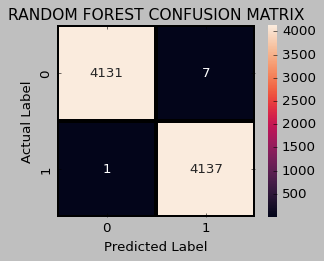


**********



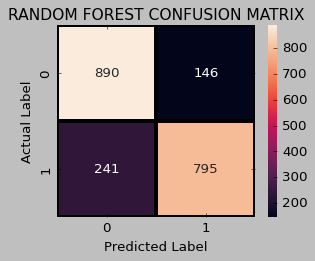


**********

Training Accuracy	: 100
Testing Accuracy	: 81.32


In [127]:
# instantiate the classifier with n_estimators = 500
model_rfc_500 = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0)

# fit the model to the training set
model_rfc_500.fit(X_smote_train, Y_smote_train)

# Predict on the test set results
Y_train_rfc_500 = model_rfc_500.predict(X_smote_train)
Y_test_rfc_500 = model_rfc_500.predict(X_smote_test)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_smote_train, Y_train_rfc_500),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_smote_test, Y_test_rfc_500),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(model_rfc_500.score(X_smote_train, Y_smote_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(model_rfc_500.score(X_smote_test, Y_smote_test)*100))

In [128]:
classification_matrix(Y_smote_train, Y_train_rfc_500, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4131    7]
 [   1 4137]]
Accuracy   : 99.9 %
Precision  : 99.83 %
Recall     : 99.98 %
F1_Score   : 100 %


In [129]:
print(metrics.classification_report(Y_smote_train, Y_train_rfc_500))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276



In [130]:
classification_matrix(Y_smote_test, Y_test_rfc_500, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[890 146]
 [241 795]]
Accuracy   : 81.32 %
Precision  : 84.48 %
Recall     : 76.74 %
F1_Score   : 80 %


In [131]:
print(metrics.classification_report(Y_smote_test, Y_test_rfc_500))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1036
           1       0.84      0.77      0.80      1036

    accuracy                           0.81      2072
   macro avg       0.82      0.81      0.81      2072
weighted avg       0.82      0.81      0.81      2072



#### d. 1000 Trees = 82,19% (DIPILIH)

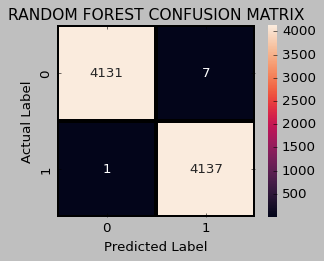


**********



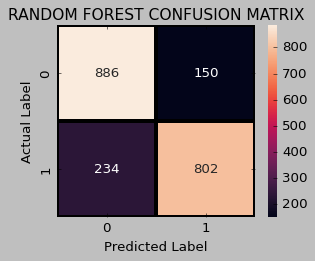


**********

Training Accuracy	: 100
Testing Accuracy	: 81.47


In [132]:
# instantiate the classifier with n_estimators = 1000
entropy_rfc_1000 = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=0)

# fit the model to the training set
entropy_rfc_1000.fit(X_smote_train, Y_smote_train)

# Predict on the test set results
Y_train_rfc_1000 = entropy_rfc_1000.predict(X_smote_train)
Y_test_rfc_1000 = entropy_rfc_1000.predict(X_smote_test)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_smote_train, Y_train_rfc_1000),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_smote_test, Y_test_rfc_1000),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(entropy_rfc_1000.score(X_smote_train, Y_smote_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(entropy_rfc_1000.score(X_smote_test, Y_smote_test)*100))

In [133]:
classification_matrix(Y_smote_train, Y_train_rfc_1000, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4131    7]
 [   1 4137]]
Accuracy   : 99.9 %
Precision  : 99.83 %
Recall     : 99.98 %
F1_Score   : 100 %


In [134]:
print(metrics.classification_report(Y_smote_train, Y_train_rfc_1000))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276



In [135]:
classification_matrix(Y_smote_test, Y_test_rfc_1000, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[886 150]
 [234 802]]
Accuracy   : 81.47 %
Precision  : 84.24 %
Recall     : 77.41 %
F1_Score   : 81 %


In [136]:
print(metrics.classification_report(Y_smote_test, Y_test_rfc_1000))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1036
           1       0.84      0.77      0.81      1036

    accuracy                           0.81      2072
   macro avg       0.82      0.81      0.81      2072
weighted avg       0.82      0.81      0.81      2072



#### e. 1500 Trees = 81,81%

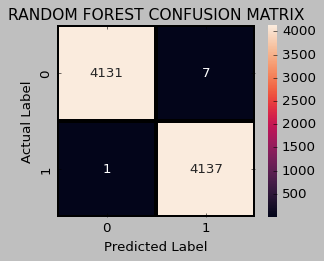


**********



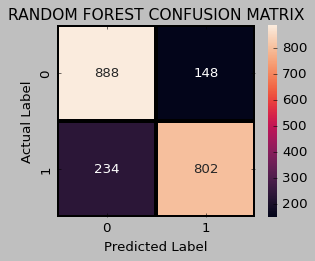


**********

Training Accuracy	: 100
Testing Accuracy	: 81.56


In [137]:
# instantiate the classifier with n_estimators = 1500
entropy_rfc_1500 = RandomForestClassifier(n_estimators=1500, criterion='entropy', random_state=0)

# fit the model to the training set
entropy_rfc_1500.fit(X_smote_train, Y_smote_train)

# Predict on the test set results
Y_train_rfc_1500 = entropy_rfc_1500.predict(X_smote_train)
Y_test_rfc_1500 = entropy_rfc_1500.predict(X_smote_test)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_smote_train, Y_train_rfc_1500),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_smote_test, Y_test_rfc_1500),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(entropy_rfc_1500.score(X_smote_train, Y_smote_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(entropy_rfc_1500.score(X_smote_test, Y_smote_test)*100))

In [138]:
classification_matrix(Y_smote_train, Y_train_rfc_1500, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4131    7]
 [   1 4137]]
Accuracy   : 99.9 %
Precision  : 99.83 %
Recall     : 99.98 %
F1_Score   : 100 %


In [139]:
print(metrics.classification_report(Y_smote_train, Y_train_rfc_1500))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276



In [140]:
classification_matrix(Y_smote_test, Y_test_rfc_1500, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[888 148]
 [234 802]]
Accuracy   : 81.56 %
Precision  : 84.42 %
Recall     : 77.41 %
F1_Score   : 81 %


In [141]:
print(metrics.classification_report(Y_smote_test, Y_test_rfc_1500))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1036
           1       0.84      0.77      0.81      1036

    accuracy                           0.82      2072
   macro avg       0.82      0.82      0.82      2072
weighted avg       0.82      0.82      0.82      2072



#### f. 2000 Trees = 81,95%

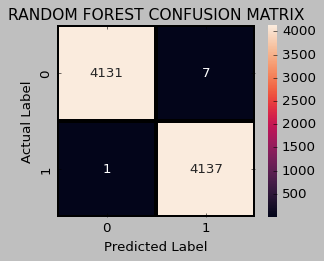


**********



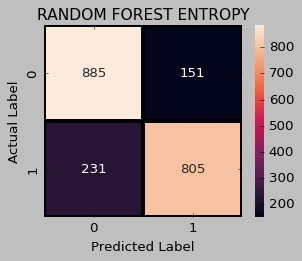


**********

Training Accuracy	: 100
Testing Accuracy	: 81.56


In [142]:
# instantiate the classifier with n_estimators = 2000
entropy_rfc_2000 = RandomForestClassifier(n_estimators=2000, criterion='entropy', random_state=0)

# fit the model to the training set
entropy_rfc_2000.fit(X_smote_train, Y_smote_train)

# Predict on the test set results
Y_train_rfc_2000 = entropy_rfc_2000.predict(X_smote_train)
Y_test_rfc_2000 = entropy_rfc_2000.predict(X_smote_test)

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_smote_train, Y_train_rfc_2000),
            annot=True, 
            fmt="d", 
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_smote_test, Y_test_rfc_2000),
            annot=True, 
            fmt="d", 
            linecolor="k", 
            linewidths=3
           )
    
plt.title("RANDOM FOREST ENTROPY", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(entropy_rfc_2000.score(X_smote_train, Y_smote_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(entropy_rfc_2000.score(X_smote_test, Y_smote_test)*100))

In [143]:
classification_matrix(Y_smote_train, Y_train_rfc_2000, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4131    7]
 [   1 4137]]
Accuracy   : 99.9 %
Precision  : 99.83 %
Recall     : 99.98 %
F1_Score   : 100 %


In [144]:
print(metrics.classification_report(Y_smote_train, Y_train_rfc_2000))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276



In [145]:
classification_matrix(Y_smote_test, Y_test_rfc_2000, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[885 151]
 [231 805]]
Accuracy   : 81.56 %
Precision  : 84.21 %
Recall     : 77.7 %
F1_Score   : 81 %


In [146]:
print(metrics.classification_report(Y_smote_test, Y_test_rfc_2000))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1036
           1       0.84      0.78      0.81      1036

    accuracy                           0.82      2072
   macro avg       0.82      0.82      0.82      2072
weighted avg       0.82      0.82      0.82      2072



### 6.1.3 Gini

#### a. 100 Trees = 81,27%

Training Accuracy	: 100
Testing Accuracy	: 81.08

**********



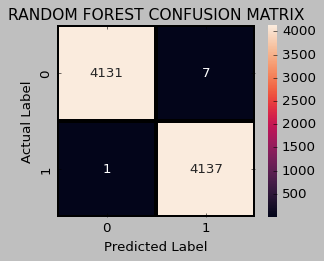


**********



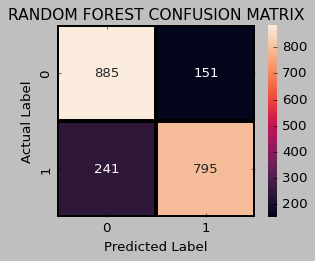

In [147]:
# instantiate the classifier with n_estimators = 100
model_rfc_100 = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)

# fit the model to the training set
model_rfc_100.fit(X_smote_train, Y_smote_train)

# Predict on the test set results
Y_train_rfc_100 = model_rfc_100.predict(X_smote_train)
Y_test_rfc_100 = model_rfc_100.predict(X_smote_test)

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(model_rfc_100.score(X_smote_train, Y_smote_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(model_rfc_100.score(X_smote_test, Y_smote_test)*100))

print("\n**********\n")

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_smote_train, Y_train_rfc_100),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_smote_test, Y_test_rfc_100),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [148]:
classification_matrix(Y_smote_train, Y_train_rfc_100, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4131    7]
 [   1 4137]]
Accuracy   : 99.9 %
Precision  : 99.83 %
Recall     : 99.98 %
F1_Score   : 100 %


In [149]:
print(metrics.classification_report(Y_smote_train, Y_train_rfc_100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276



In [150]:
classification_matrix(Y_smote_test, Y_test_rfc_100, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[885 151]
 [241 795]]
Accuracy   : 81.08 %
Precision  : 84.04 %
Recall     : 76.74 %
F1_Score   : 80 %


In [151]:
print(metrics.classification_report(Y_smote_test, Y_test_rfc_100))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1036
           1       0.84      0.77      0.80      1036

    accuracy                           0.81      2072
   macro avg       0.81      0.81      0.81      2072
weighted avg       0.81      0.81      0.81      2072



#### b. 200 Trees = 81,47%

Training Accuracy	: 100
Testing Accuracy	: 81.18

**********



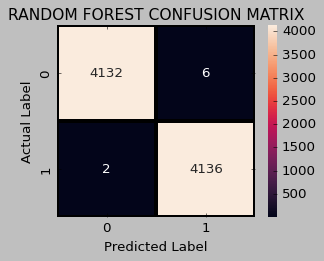


**********



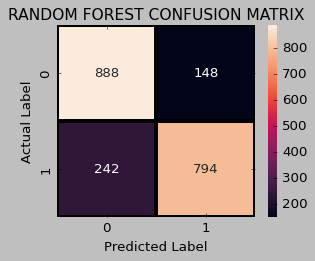

In [152]:
# instantiate the classifier with n_estimators = 200
model_rfc_200 = RandomForestClassifier(n_estimators=200, criterion='gini', random_state=0)

# fit the model to the training set
model_rfc_200.fit(X_smote_train, Y_smote_train)

# Predict on the test set results
Y_train_rfc_200 = model_rfc_200.predict(X_smote_train)
Y_test_rfc_200 = model_rfc_200.predict(X_smote_test)

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(model_rfc_200.score(X_smote_train, Y_smote_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(model_rfc_200.score(X_smote_test, Y_smote_test)*100))

print("\n**********\n")

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_smote_train, Y_train_rfc_200),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_smote_test, Y_test_rfc_200),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [153]:
classification_matrix(Y_smote_train, Y_train_rfc_200, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4132    6]
 [   2 4136]]
Accuracy   : 99.9 %
Precision  : 99.86 %
Recall     : 99.95 %
F1_Score   : 100 %


In [154]:
print(metrics.classification_report(Y_smote_train, Y_train_rfc_200))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276



In [155]:
classification_matrix(Y_smote_test, Y_test_rfc_200, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[888 148]
 [242 794]]
Accuracy   : 81.18 %
Precision  : 84.29 %
Recall     : 76.64 %
F1_Score   : 80 %


In [156]:
print(metrics.classification_report(Y_smote_test, Y_test_rfc_200))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1036
           1       0.84      0.77      0.80      1036

    accuracy                           0.81      2072
   macro avg       0.81      0.81      0.81      2072
weighted avg       0.81      0.81      0.81      2072



#### c. 500 Trees = 81,42%

Training Accuracy	: 100
Testing Accuracy	: 81.27

**********



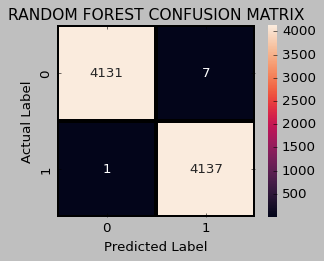


**********



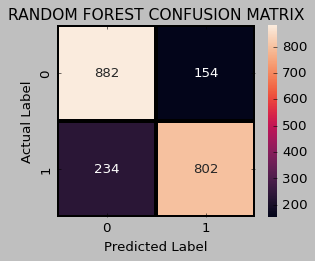

In [157]:
# instantiate the classifier with n_estimators = 500
model_rfc_500 = RandomForestClassifier(n_estimators=500, criterion='gini', random_state=0)

# fit the model to the training set
model_rfc_500.fit(X_smote_train, Y_smote_train)

# Predict on the test set results
Y_train_rfc_500 = model_rfc_500.predict(X_smote_train)
Y_test_rfc_500 = model_rfc_500.predict(X_smote_test)

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(model_rfc_500.score(X_smote_train, Y_smote_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(model_rfc_500.score(X_smote_test, Y_smote_test)*100))

print("\n**********\n")

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_smote_train, Y_train_rfc_500),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_smote_test, Y_test_rfc_500),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [158]:
classification_matrix(Y_smote_train, Y_train_rfc_500, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4131    7]
 [   1 4137]]
Accuracy   : 99.9 %
Precision  : 99.83 %
Recall     : 99.98 %
F1_Score   : 100 %


In [159]:
print(metrics.classification_report(Y_smote_train, Y_train_rfc_500))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276



In [160]:
classification_matrix(Y_smote_test, Y_test_rfc_500, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[882 154]
 [234 802]]
Accuracy   : 81.27 %
Precision  : 83.89 %
Recall     : 77.41 %
F1_Score   : 81 %


In [161]:
print(metrics.classification_report(Y_smote_test, Y_test_rfc_500))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1036
           1       0.84      0.77      0.81      1036

    accuracy                           0.81      2072
   macro avg       0.81      0.81      0.81      2072
weighted avg       0.81      0.81      0.81      2072



#### d. 1000 Trees = 81,27%

Training Accuracy	: 100
Testing Accuracy	: 81.52

**********



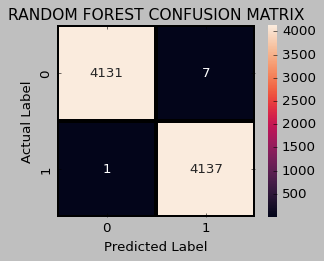


**********



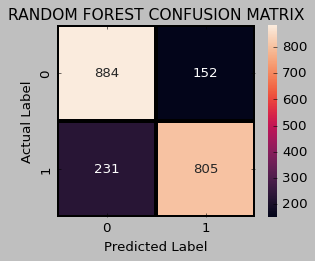

In [162]:
# instantiate the classifier with n_estimators = 1000
model_rfc_1000 = RandomForestClassifier(n_estimators=1000, criterion='gini', random_state=0)

# fit the model to the training set
model_rfc_1000.fit(X_smote_train, Y_smote_train)

# Predict on the test set results
Y_train_rfc_1000 = model_rfc_1000.predict(X_smote_train)
Y_test_rfc_1000 = model_rfc_1000.predict(X_smote_test)

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(model_rfc_1000.score(X_smote_train, Y_smote_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(model_rfc_1000.score(X_smote_test, Y_smote_test)*100))

print("\n**********\n")

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_smote_train, Y_train_rfc_1000),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_smote_test, Y_test_rfc_1000),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [163]:
classification_matrix(Y_smote_train, Y_train_rfc_1000, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4131    7]
 [   1 4137]]
Accuracy   : 99.9 %
Precision  : 99.83 %
Recall     : 99.98 %
F1_Score   : 100 %


In [164]:
print(metrics.classification_report(Y_smote_train, Y_train_rfc_1000))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276



In [165]:
classification_matrix(Y_smote_test, Y_test_rfc_1000, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[884 152]
 [231 805]]
Accuracy   : 81.52 %
Precision  : 84.12 %
Recall     : 77.7 %
F1_Score   : 81 %


In [166]:
print(metrics.classification_report(Y_smote_test, Y_test_rfc_1000))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1036
           1       0.84      0.78      0.81      1036

    accuracy                           0.82      2072
   macro avg       0.82      0.82      0.81      2072
weighted avg       0.82      0.82      0.81      2072



#### e. 1500 Trees = 81,52%

Training Accuracy	: 100
Testing Accuracy	: 81.52

**********



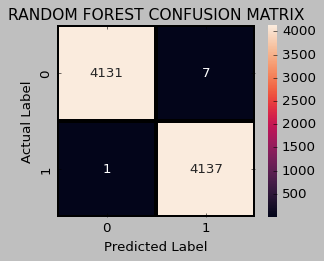


**********



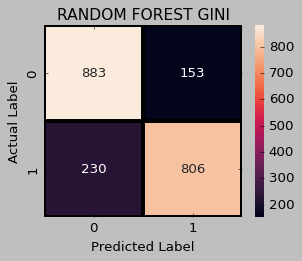

In [167]:
# instantiate the classifier with n_estimators = 1500
gini_rfc_1500 = RandomForestClassifier(n_estimators=1500, criterion='gini', random_state=0)

# fit the model to the training set
gini_rfc_1500.fit(X_smote_train, Y_smote_train)

# Predict on the test set results
Y_train_rfc_1500 = gini_rfc_1500.predict(X_smote_train)
Y_test_rfc_1500 = gini_rfc_1500.predict(X_smote_test)

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(gini_rfc_1500.score(X_smote_train, Y_smote_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(gini_rfc_1500.score(X_smote_test, Y_smote_test)*100))

print("\n**********\n")

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_smote_train, Y_train_rfc_1500),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(
            confusion_matrix(Y_smote_test, Y_test_rfc_1500),
            annot=True,
            fmt="d",
            linecolor="k",
            linewidths=3
           )
    
plt.title("RANDOM FOREST GINI", fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [168]:
classification_matrix(Y_smote_train, Y_train_rfc_1500, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4131    7]
 [   1 4137]]
Accuracy   : 99.9 %
Precision  : 99.83 %
Recall     : 99.98 %
F1_Score   : 100 %


In [169]:
print(metrics.classification_report(Y_smote_train, Y_train_rfc_1500))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276



In [170]:
classification_matrix(Y_smote_test, Y_test_rfc_1500, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[883 153]
 [230 806]]
Accuracy   : 81.52 %
Precision  : 84.05 %
Recall     : 77.8 %
F1_Score   : 81 %


In [171]:
print(metrics.classification_report(Y_smote_test, Y_test_rfc_1500))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1036
           1       0.84      0.78      0.81      1036

    accuracy                           0.82      2072
   macro avg       0.82      0.82      0.81      2072
weighted avg       0.82      0.82      0.81      2072



#### f. 2000 Trees = 81,56%

Training Accuracy	: 100
Testing Accuracy	: 81.61

**********



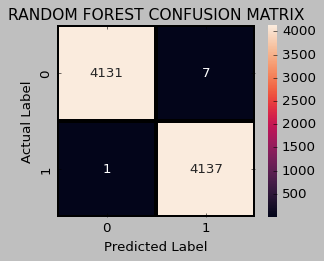


**********



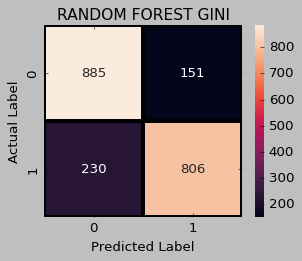

In [172]:
# instantiate the classifier with n_estimators = 2000
model_rfc_2000 = RandomForestClassifier(n_estimators=2000, criterion='gini', random_state=0)

# fit the model to the training set
model_rfc_2000.fit(X_smote_train, Y_smote_train)

# Predict on the test set results
Y_train_rfc_2000 = model_rfc_2000.predict(X_smote_train)
Y_test_rfc_2000 = model_rfc_2000.predict(X_smote_test)

# Check accuracy score 
print("Training Accuracy\t: {0:.0f}".format(model_rfc_2000.score(X_smote_train, Y_smote_train)*100))
print("Testing Accuracy\t: {0:.2f}".format(model_rfc_2000.score(X_smote_test, Y_smote_test)*100))

print("\n**********\n")

# CONFUSION MATRIX DATA TRAIN
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_smote_train, Y_train_rfc_2000),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

print("\n**********\n")

# CONFUSION MATRIX DATA TEST
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(Y_smote_test, Y_test_rfc_2000),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST GINI",fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [173]:
classification_matrix(Y_smote_train, Y_train_rfc_2000, 'Random Forest Training')

Evaluation Model: Random Forest Training
[[4131    7]
 [   1 4137]]
Accuracy   : 99.9 %
Precision  : 99.83 %
Recall     : 99.98 %
F1_Score   : 100 %


In [174]:
print(metrics.classification_report(Y_smote_train, Y_train_rfc_2000))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      4138

    accuracy                           1.00      8276
   macro avg       1.00      1.00      1.00      8276
weighted avg       1.00      1.00      1.00      8276



In [175]:
classification_matrix(Y_smote_test, Y_test_rfc_2000, 'Random Forest Testing')

Evaluation Model: Random Forest Testing
[[885 151]
 [230 806]]
Accuracy   : 81.61 %
Precision  : 84.22 %
Recall     : 77.8 %
F1_Score   : 81 %


In [176]:
print(metrics.classification_report(Y_smote_test, Y_test_rfc_2000))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1036
           1       0.84      0.78      0.81      1036

    accuracy                           0.82      2072
   macro avg       0.82      0.82      0.82      2072
weighted avg       0.82      0.82      0.82      2072



### 6.1.4 Feature Impotances

In [177]:
# view the feature scores
feature_scores = pd.Series(entropy_rfc_1000.feature_importances_, 
                           index=X_smote_train.columns
                          ).sort_values(ascending=False)
feature_scores

tenure                            0.146225
TotalCharges                      0.141592
MonthlyCharges                    0.140243
Contract                          0.132328
PaperlessBilling                  0.037792
PaymentMethod_Electronic check    0.034505
InternetService_Fiber optic       0.033704
OnlineSecurity                    0.033230
TechSupport                       0.026666
Partner                           0.025949
Dependents                        0.024231
OnlineBackup                      0.023811
MultipleLines                     0.021688
StreamingMovies                   0.019689
SeniorCitizen                     0.019398
DeviceProtection                  0.018380
StreamingTV                       0.017687
gender_Male                       0.016544
gender_Female                     0.016367
InternetService_No                0.015993
PaymentMethod_Credit card         0.012799
PaymentMethod_Bank transfer       0.012318
PaymentMethod_Mailed check        0.011523
InternetSer

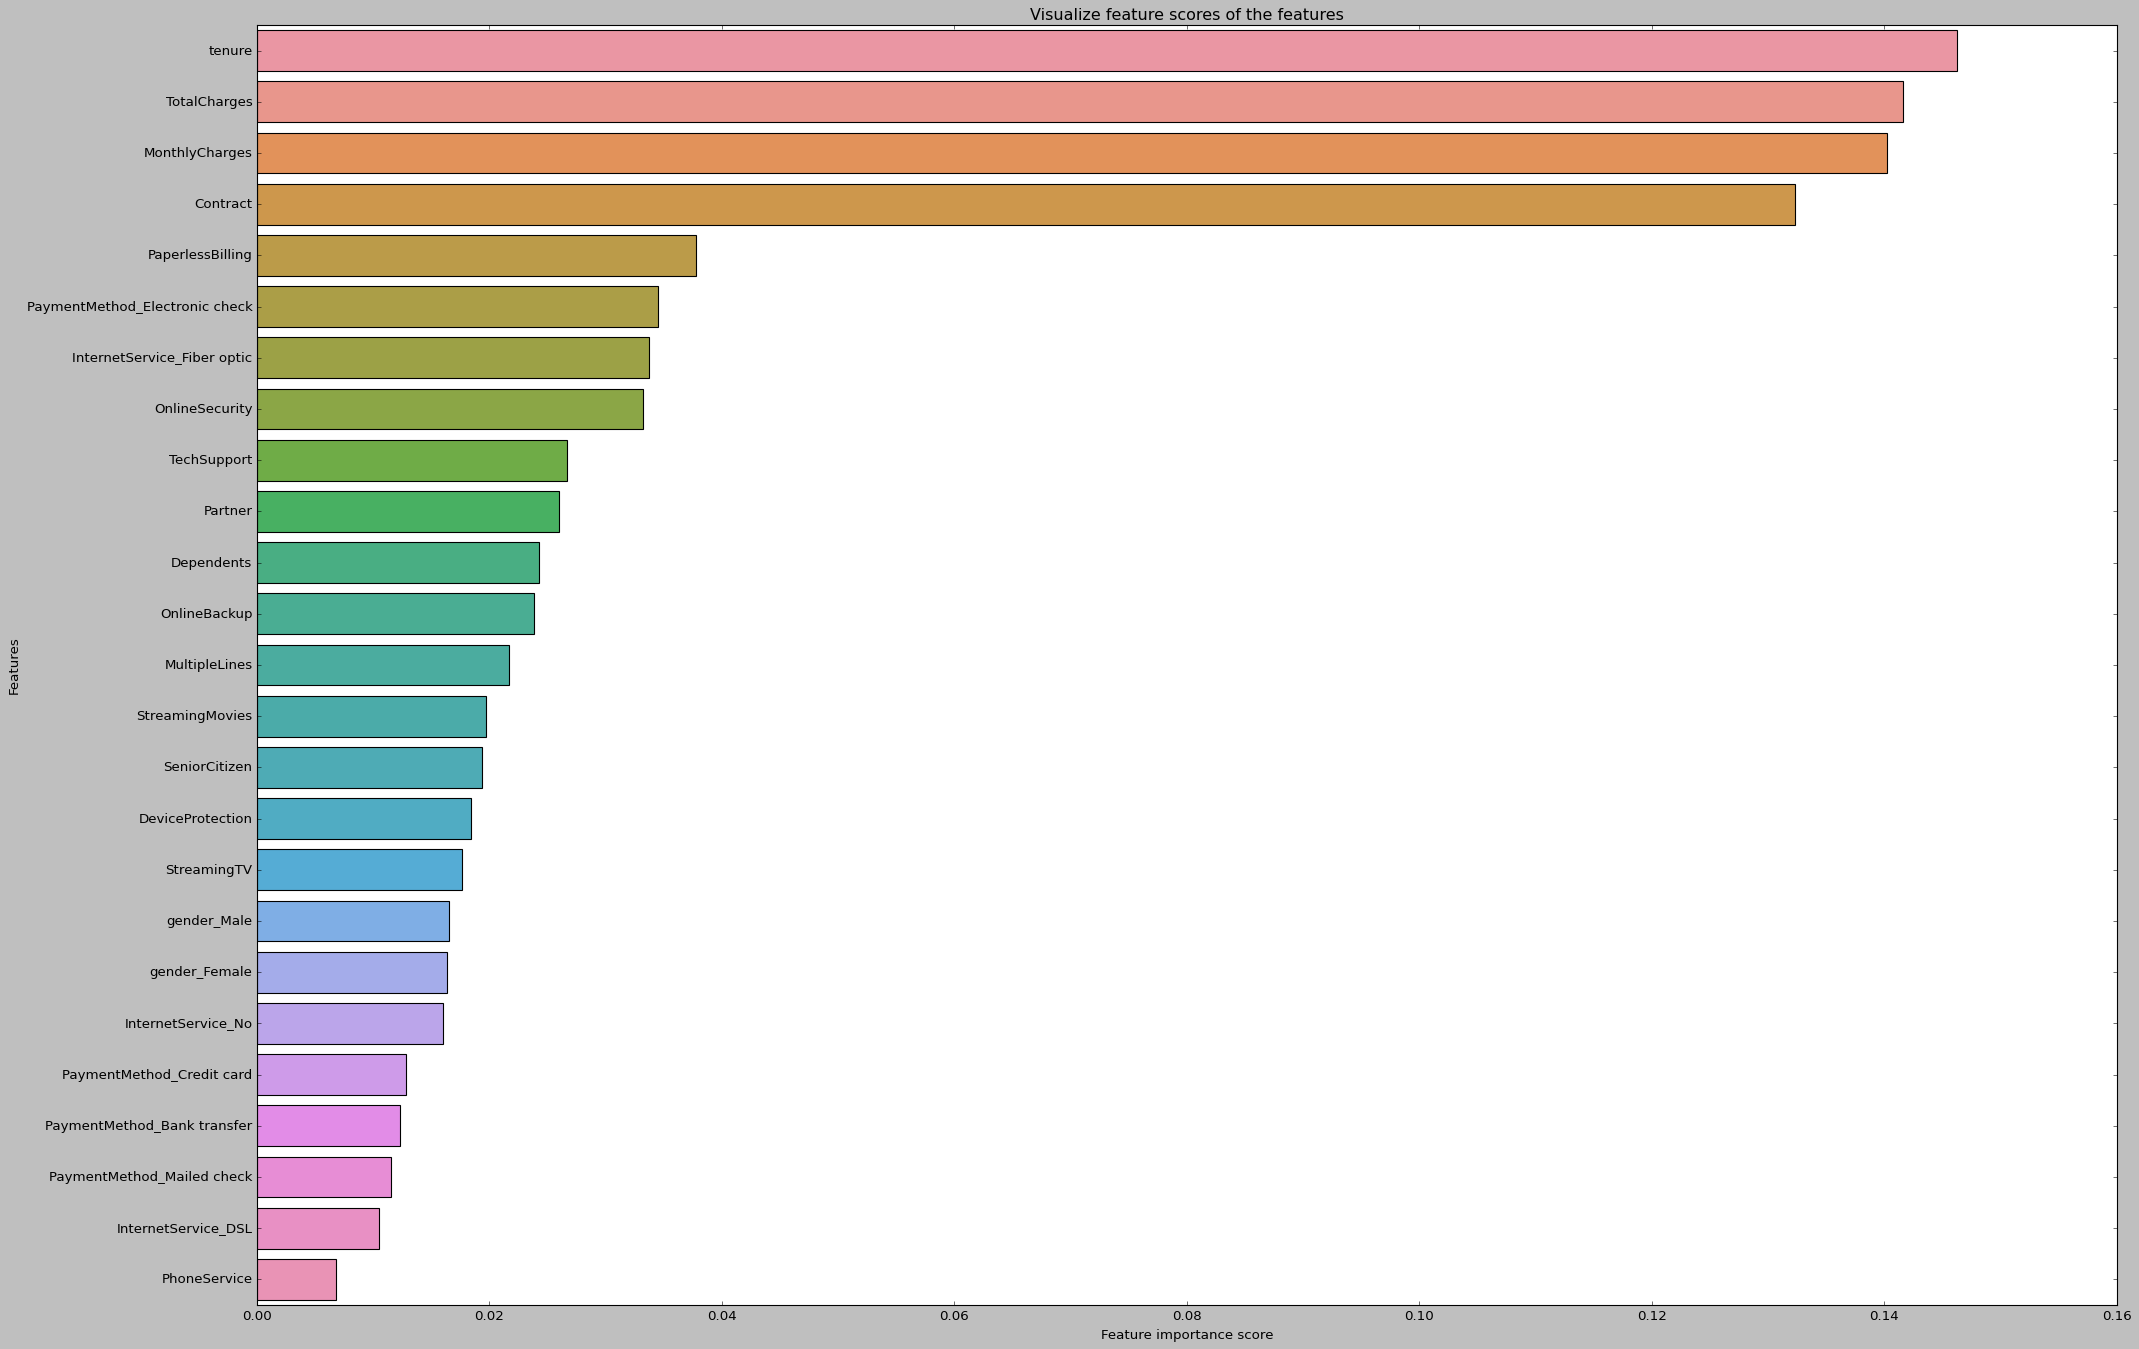

In [178]:
# Creating a seaborn bar plot
fig, ax = plt.subplots(figsize=(30, 20))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### 6.1.5 Build the Random Forest model on selected features

Now, I will drop the least important feature `PhoneService`, `InternetService_DSL`, dan `InternetService_No` from the model, rebuild the model and check its effect on accuracy.

In [179]:
# # drop the least important feature from X_train and X_test
# X_smote_train.drop(['PhoneService', 'InternetService_DSL', 'InternetService_No'], axis=1)
# X_smote_test.drop(['PhoneService', 'InternetService_DSL', 'InternetService_No'], axis=1)

Now, I will build the random forest model again and check accuracy.

In [180]:
# # instantiate the classifier with n_estimators = 1000
# test_rfc = RandomForestClassifier(n_estimators=1000, random_state=0)

# # fit the model to the training set
# test_rfc.fit(X_smote_train, Y_smote_train)

# # Predict on the test set results
# y_pred_rfc = test_rfc.predict(X_smote_test)

# # Check accuracy score 
# print('Model accuracy score with native_country_41 variable removed : {0:0.2f}'. format(accuracy_score(Y_smote_test, y_pred_rfc)))

> **Interpretation**

- I have removed the `PhoneService`, `InternetService_DSL`, dan `InternetService_No` variable from the model, rebuild it and checked its accuracy. 

- The accuracy of the model now comes out to be 0.8544. 
- The accuracy of the model with all the variables taken into account is 0.8521. 
- So, we can see that the model accuracy has been improved with `PhoneService`, `InternetService_DSL`, dan `InternetService_No` variable removed from the model.

> Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.
> But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 
> We have another tool called `Confusion matrix` that comes to our rescue.